In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/Users/nickq/Repos/MoodHive/data/cleandata/goemotions_1_clean.csv")

In [4]:
data.dropna()

,text,emotion
0,That game hurt.,sadness
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral
5,Right? Considering it’s such an important docu...,gratitude
...,...,...
69995,"It's about fucking time, hope this is real.",desire
69996,This is great! Can anyone make a request with ...,admiration
69997,I’m sorry. Can you please explain what are the...,curiosity
69998,No but it should be,neutral


In [108]:
data.head()

,text,emotion,Sentiment,CleanText
0,That game hurt.,sadness,Negative,game hurt
2,"You do right, if you don't care then fuck 'em!",neutral,Negative,right care fuck em
3,Man I love reddit.,love,Positive,Man love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",neutral,Positive,[NAME] near them Falcon
5,Right? Considering it’s such an important docu...,gratitude,Positive,Right Considering it’s important document know...


In [109]:
data.shape

(68871, 4)

In [110]:
data.dtypes

text         object
emotion      object
Sentiment    object
CleanText    object
dtype: object

In [111]:
data.isnull().sum()

text         0
emotion      0
Sentiment    0
CleanText    0
dtype: int64

<AxesSubplot:xlabel='emotion', ylabel='count'>

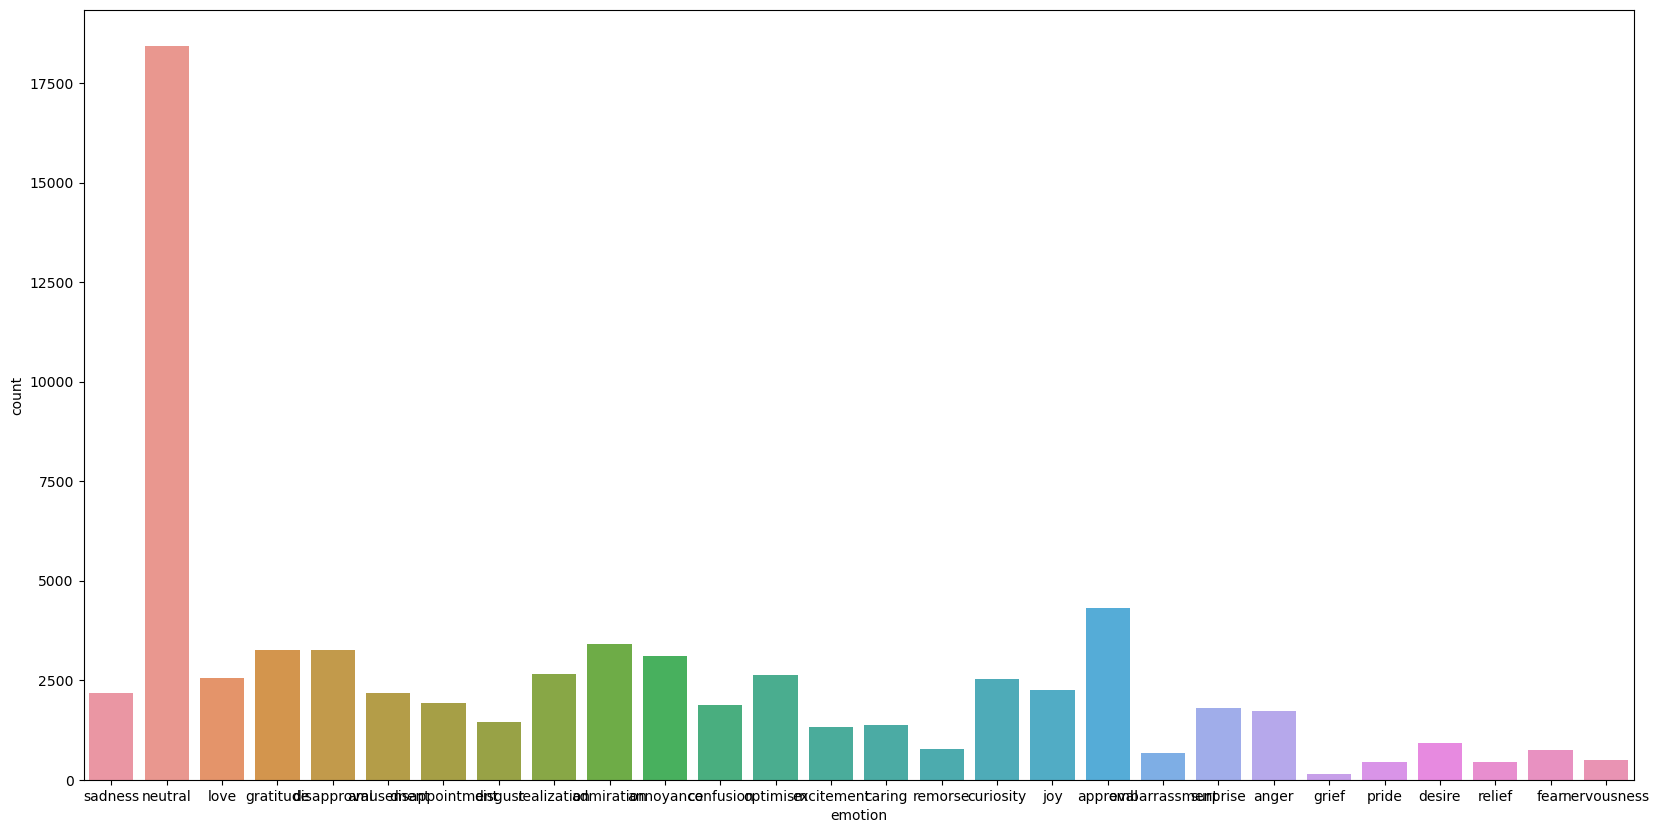

In [112]:
# seaborn value count of the emotions
plt.figure(figsize=(20,10))
sns.countplot(x="emotion", data=data)

### Data Exploration
+ Sentiment Analysis
+ Keyword Extraction
    - Keywords for each emotion
    - Wordcloud


In [113]:
# Sentiment Analysis
from textblob import TextBlob

In [114]:
def GetSentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [115]:
data['Sentiment'] = data["text"].apply(GetSentiment)

In [116]:
data.head()

,text,emotion,Sentiment,CleanText
0,That game hurt.,sadness,Negative,game hurt
2,"You do right, if you don't care then fuck 'em!",neutral,Negative,right care fuck em
3,Man I love reddit.,love,Positive,Man love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",neutral,Positive,[NAME] near them Falcon
5,Right? Considering it’s such an important docu...,gratitude,Positive,Right Considering it’s important document know...


/Users/nickq/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nickq/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


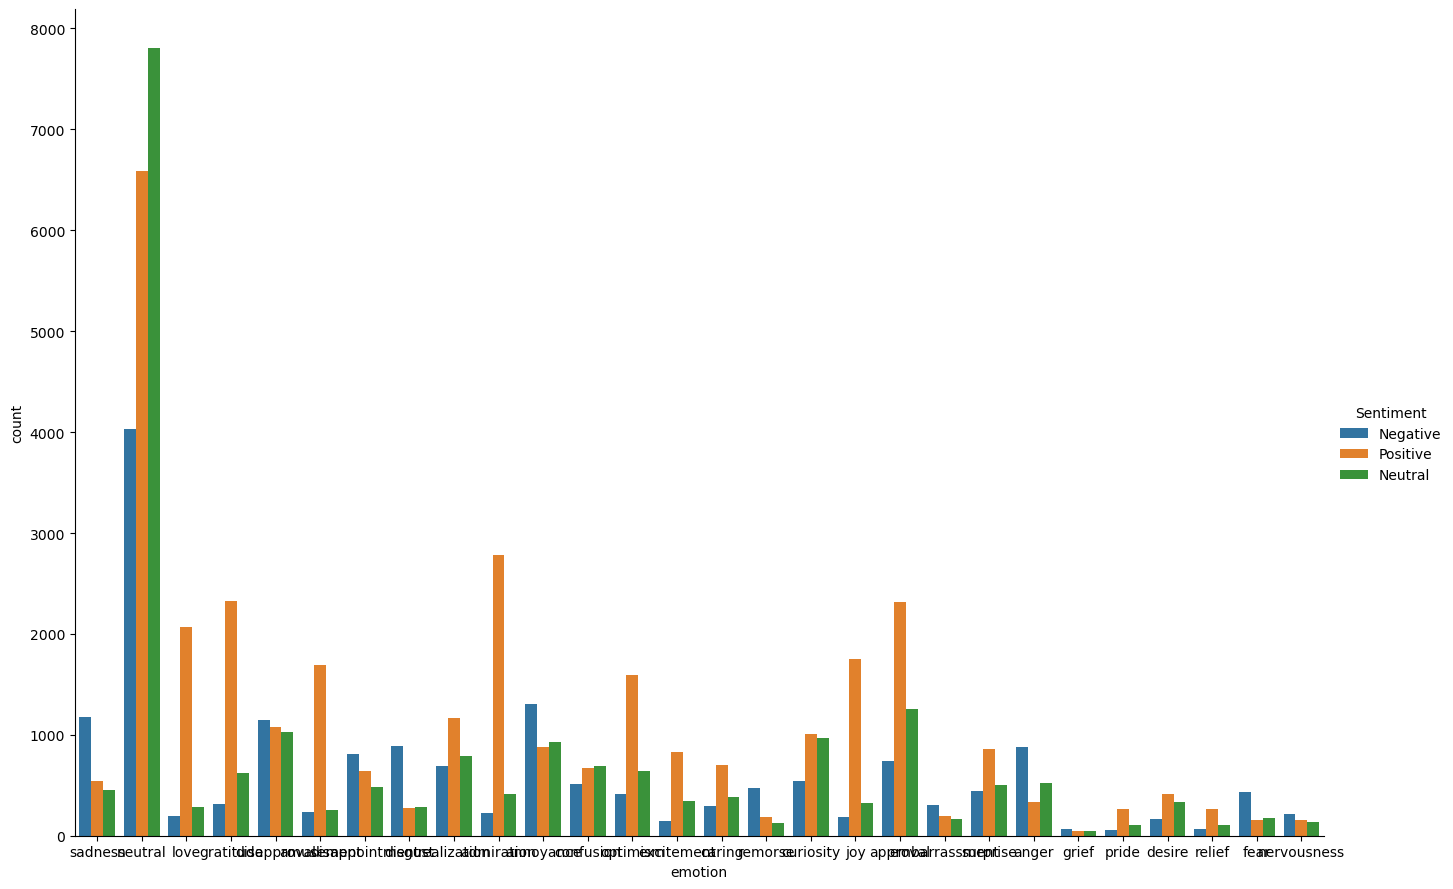

In [117]:
# Compare emotion vs sentiment
sns.factorplot(x="emotion", hue="Sentiment", data=data, kind="count", size=9, aspect=1.5)

### Text Cleaning
+ Remove noise
    - stopwords
    - special characters
    - punctuation
    - emojis

In [118]:
import neattext.functions as nfx

In [119]:
data["CleanText"] = data["text"].apply(nfx.remove_stopwords)

In [120]:
data["CleanText"] = data["CleanText"].apply(nfx.remove_userhandles)

In [121]:
data["CleanText"] = data["CleanText"].apply(nfx.remove_punctuations)

In [122]:
data["CleanText"] = data["CleanText"].apply(nfx.remove_emojis)

In [123]:
data[["text", "CleanText"]]

,text,CleanText
0,That game hurt.,game hurt
2,"You do right, if you don't care then fuck 'em!",right care fuck em
3,Man I love reddit.,Man love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",[NAME] near them Falcon
5,Right? Considering it’s such an important docu...,Right Considering it’s important document know...
...,...,...
69995,"It's about fucking time, hope this is real.",fucking time hope real
69996,This is great! Can anyone make a request with ...,great request draw
69997,I’m sorry. Can you please explain what are the...,I’m sorry explain 2 accounts order creation co...
69998,No but it should be,


### Keyword Extraction
+ Extract common words per class of emotion

In [124]:
from collections import Counter

In [125]:
def ExtractKeywords(text, num=50):
    tokens = [ tok for tok in text.split()]
    mostCommonTokens = Counter(tokens).most_common(num)
    return dict(mostCommonTokens)

In [126]:
# Plot
def PlotMostCommonWords(mydict, emotionName):
    dataframe = pd.DataFrame(mydict.items(),columns=["token", "count"])
    plt.figure(figsize=(20,10))
    plt.title("{} Common Keywords Plot".format(emotionName))
    sns.barplot(x="token", y="count", data=dataframe)
    plt.xticks(rotation=45)
    plt.show()

In [127]:
def GetMostCommonWords(emotionType, doPlot=False):
    emotionList = data[data["emotion"] == emotionType]["CleanText"].tolist()
    keywordDict = ExtractKeywords(" ".join(emotionList))
    if doPlot:
        PlotMostCommonWords(keywordDict, emotionType)
    return keywordDict

In [128]:
# List of emotions
emotionList = data['emotion'].unique().tolist()
emotionList

['sadness',
 'neutral',
 'love',
 'gratitude',
 'disapproval',
 'amusement',
 'disappointment',
 'disgust',
 'realization',
 'admiration',
 'annoyance',
 'confusion',
 'optimism',
 'excitement',
 'caring',
 'remorse',
 'curiosity',
 'joy',
 'approval',
 'embarrassment',
 'surprise',
 'anger',
 'grief',
 'pride',
 'desire',
 'relief',
 'fear',
 'nervousness']

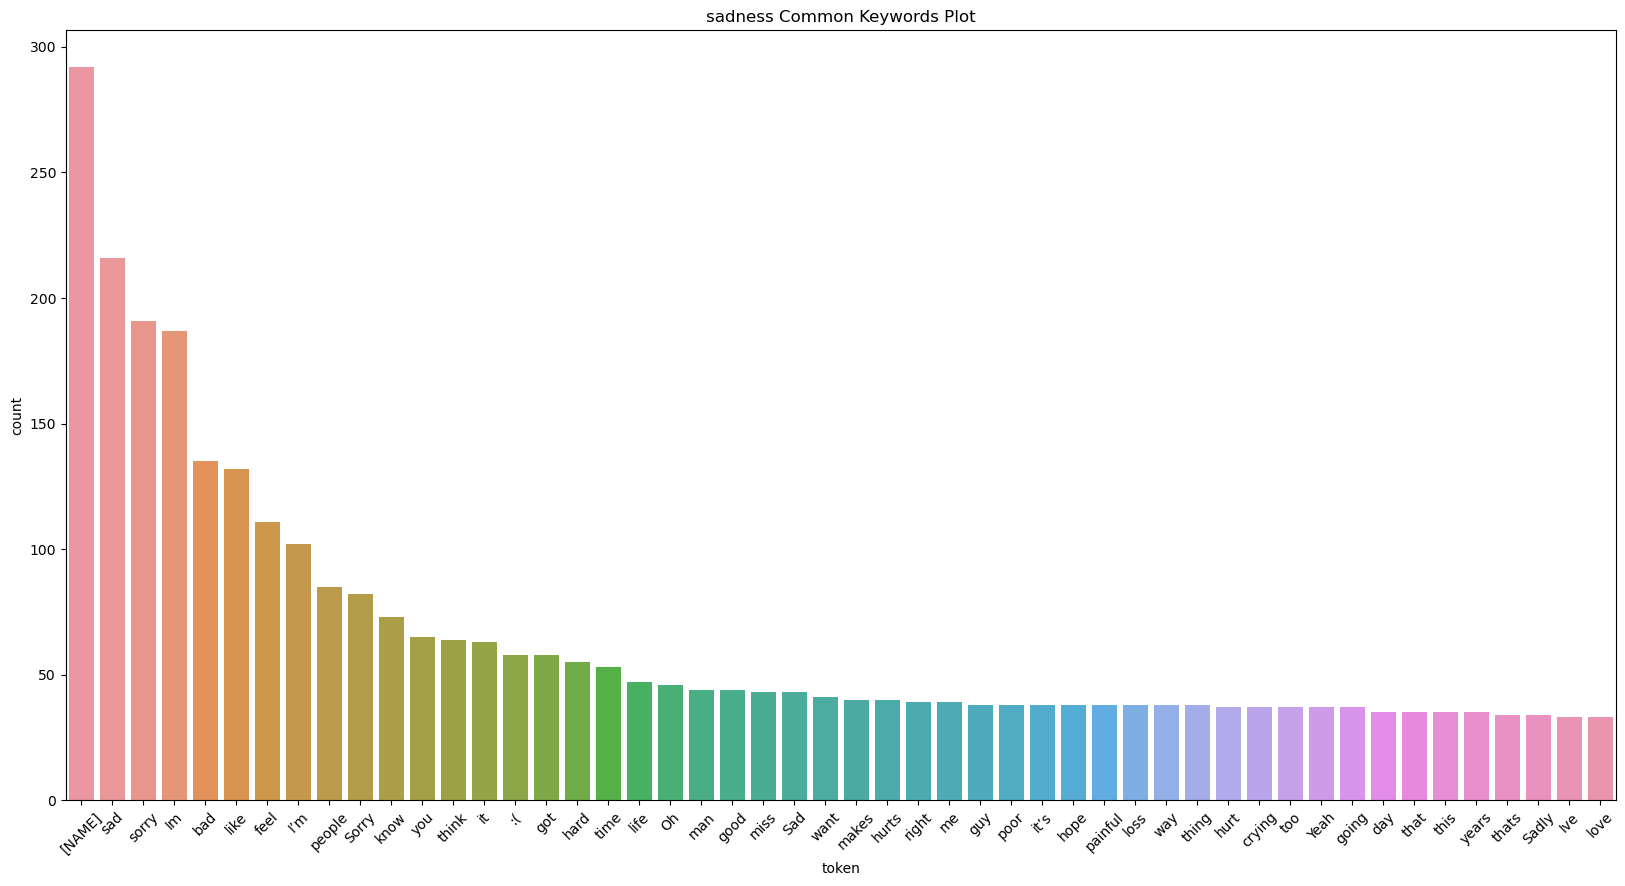

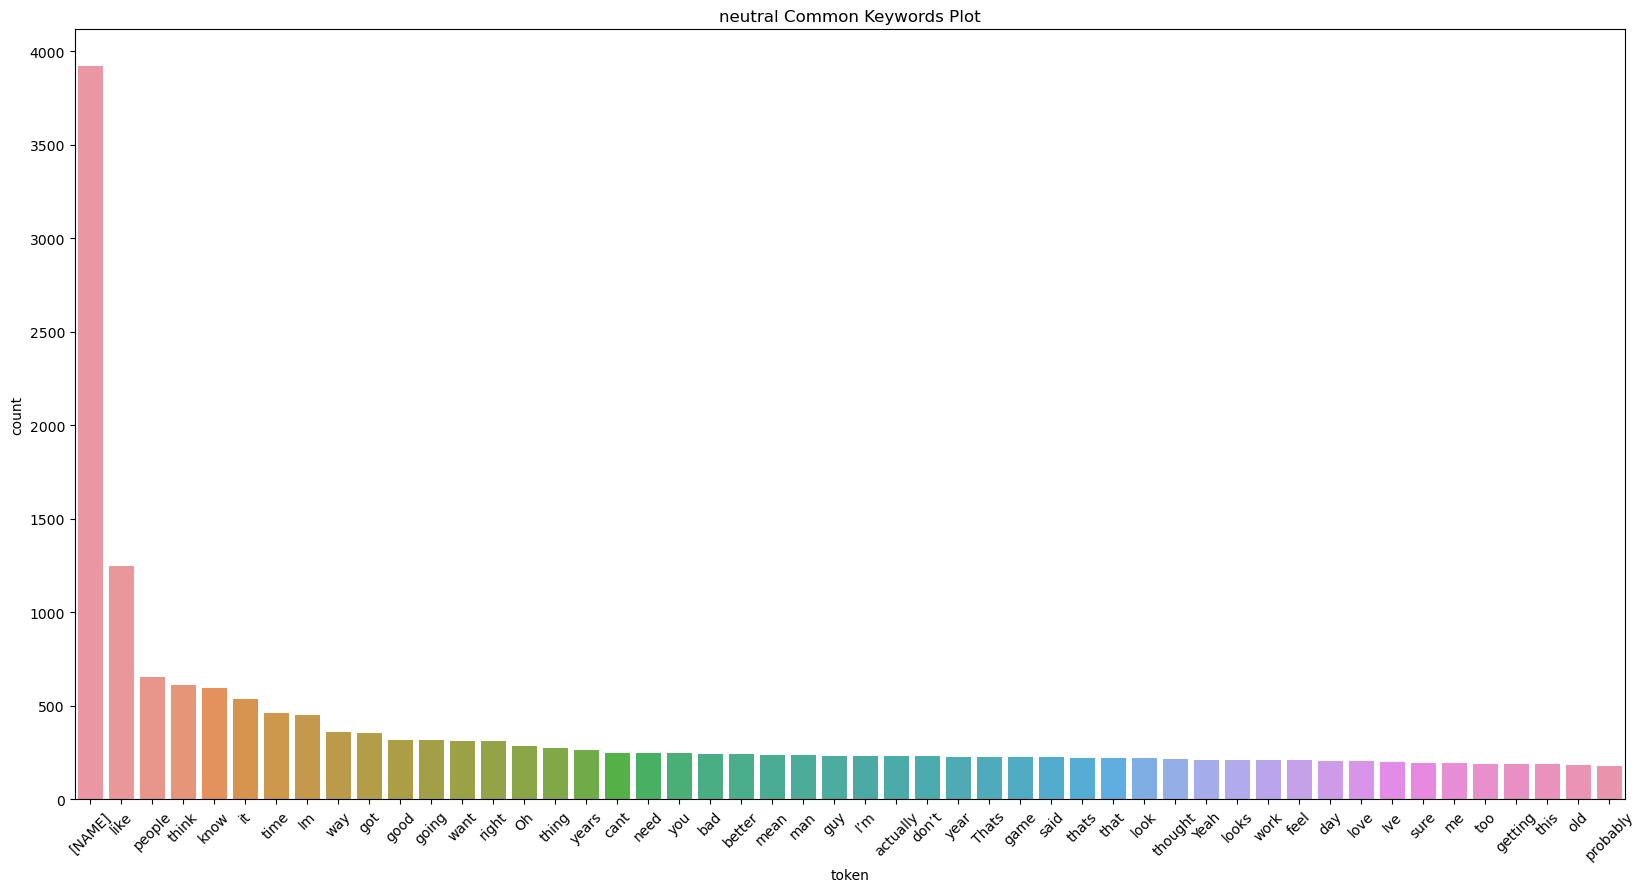

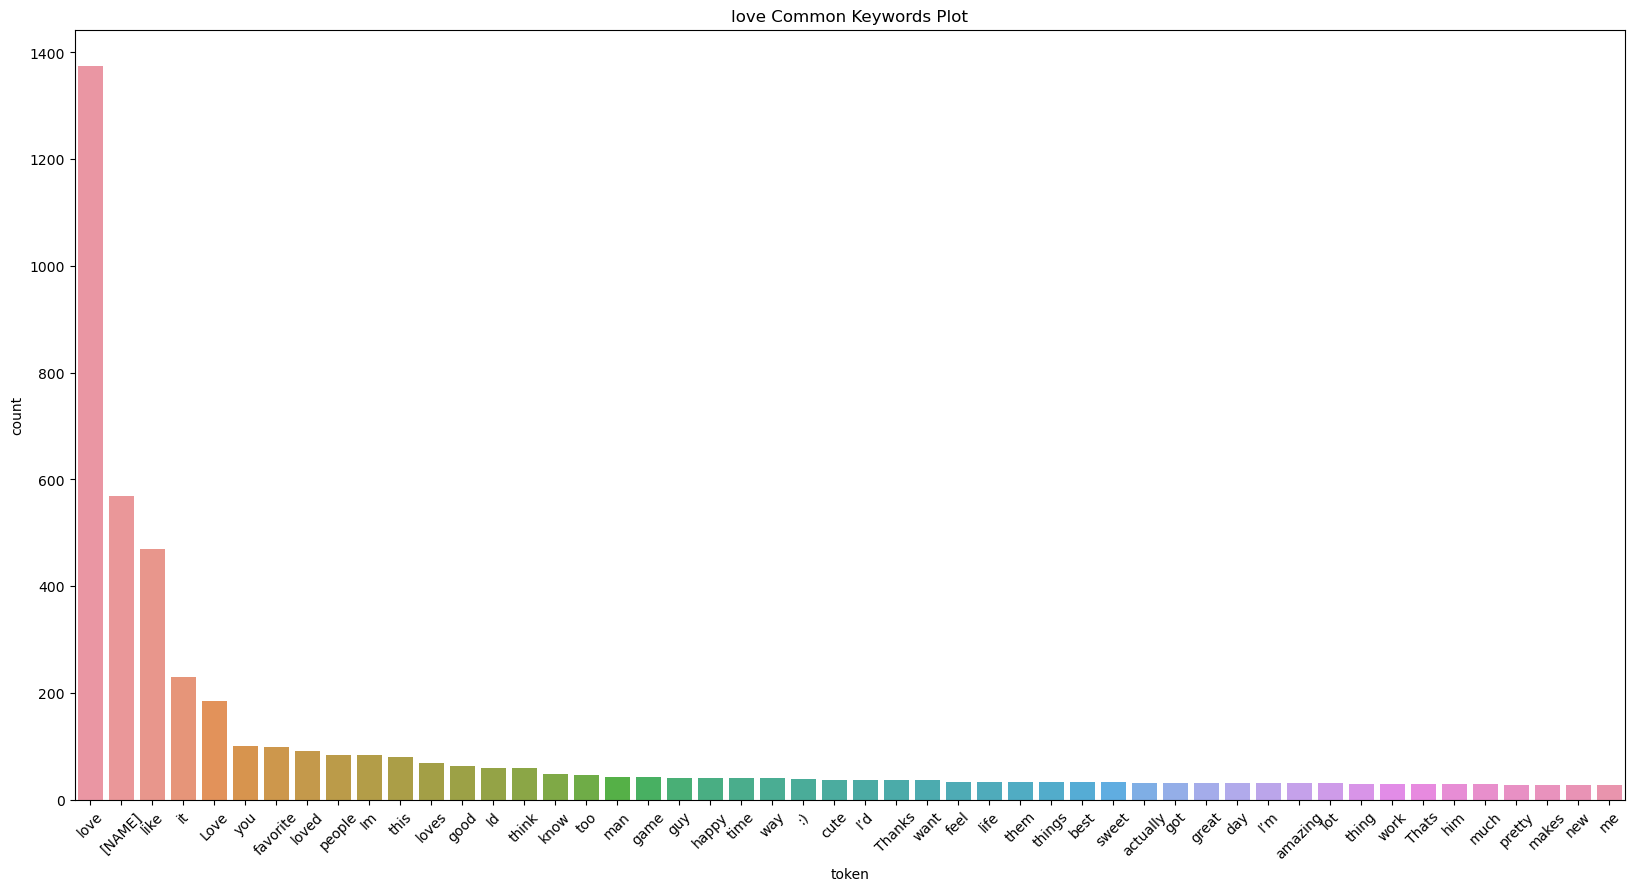

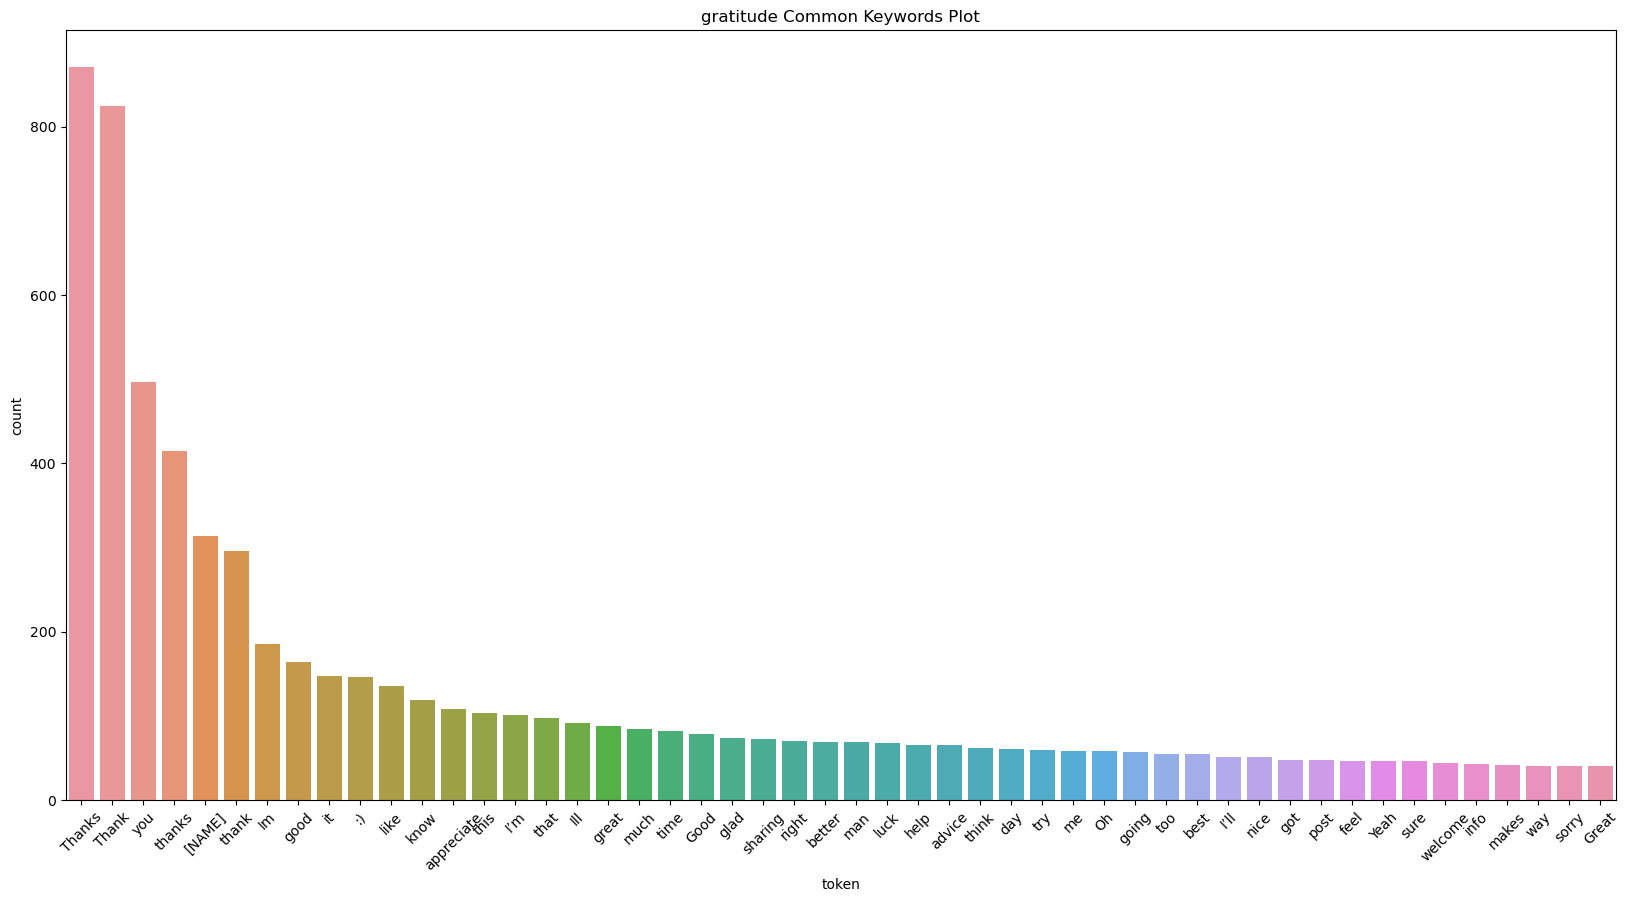

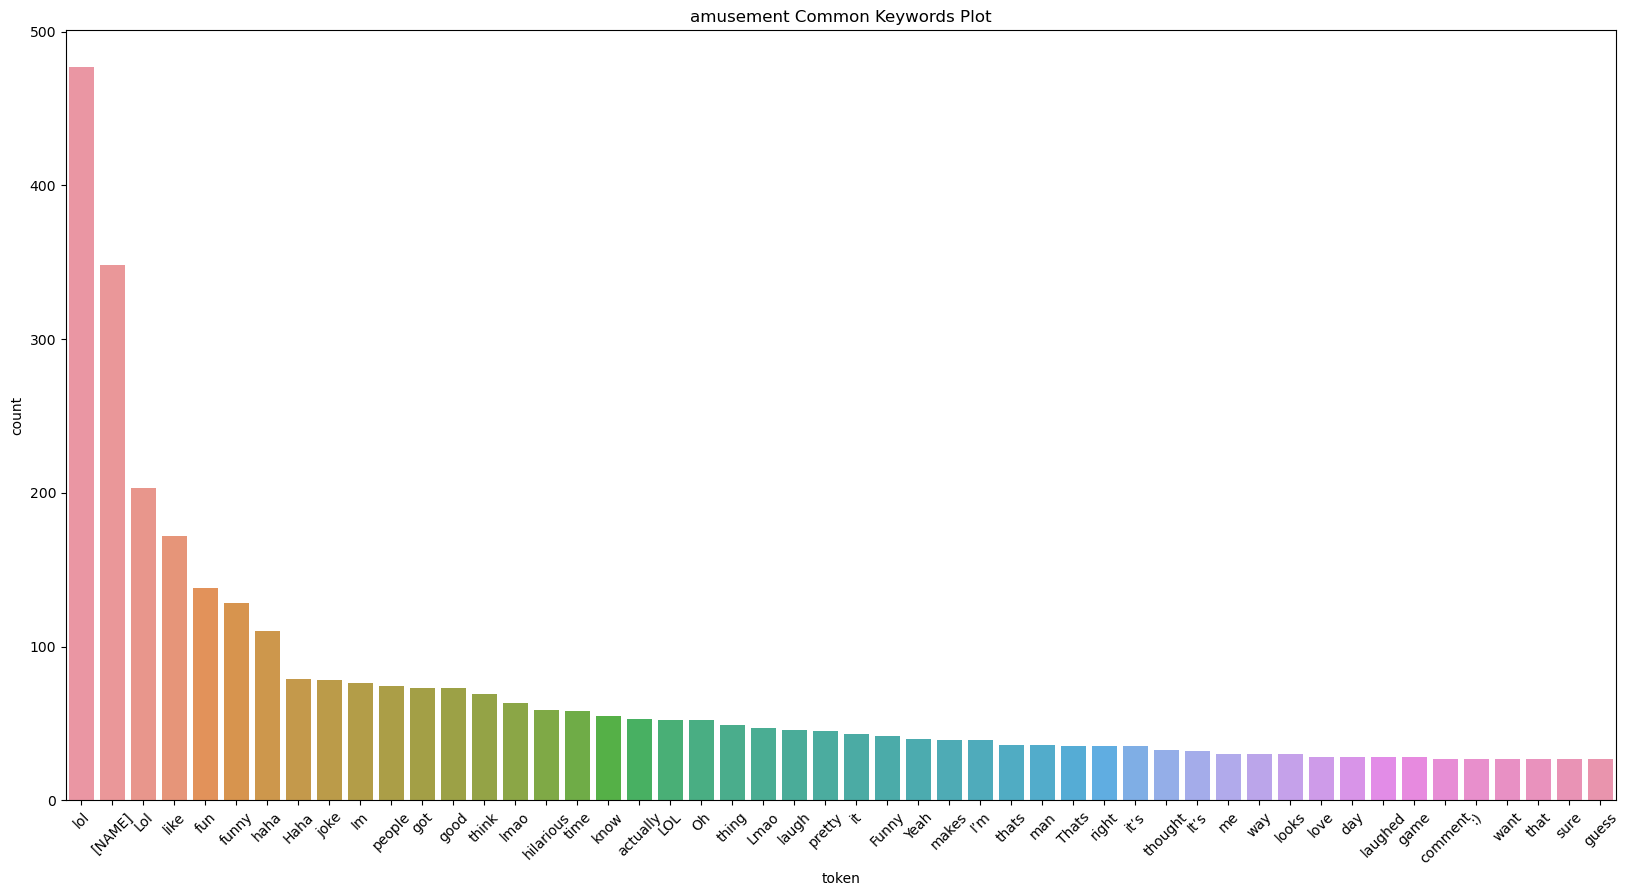

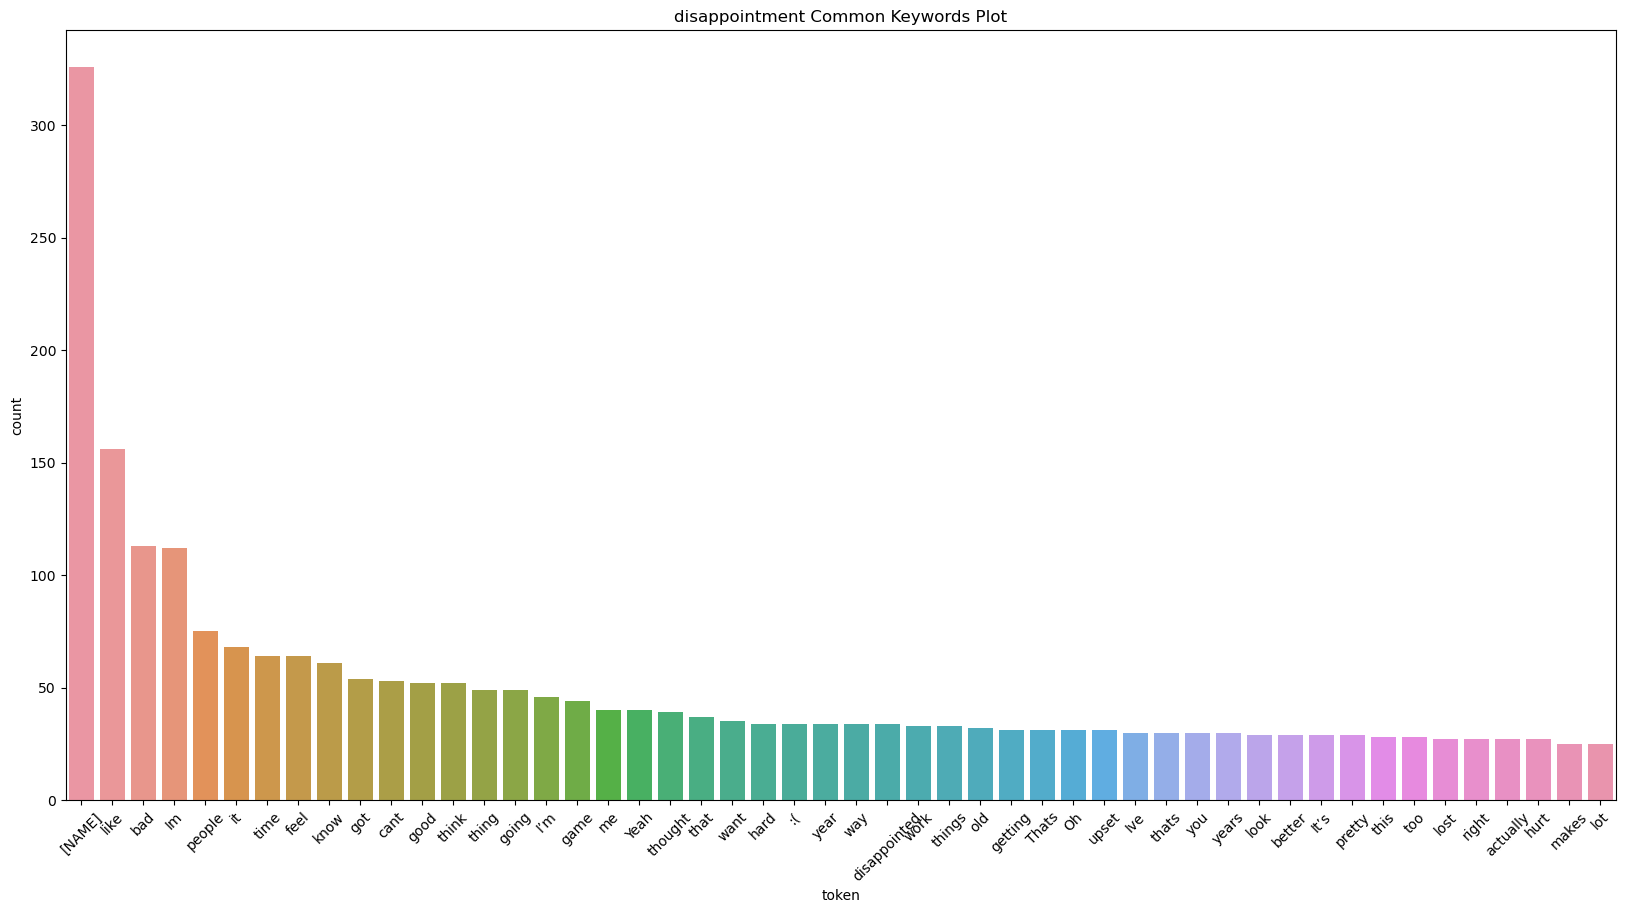

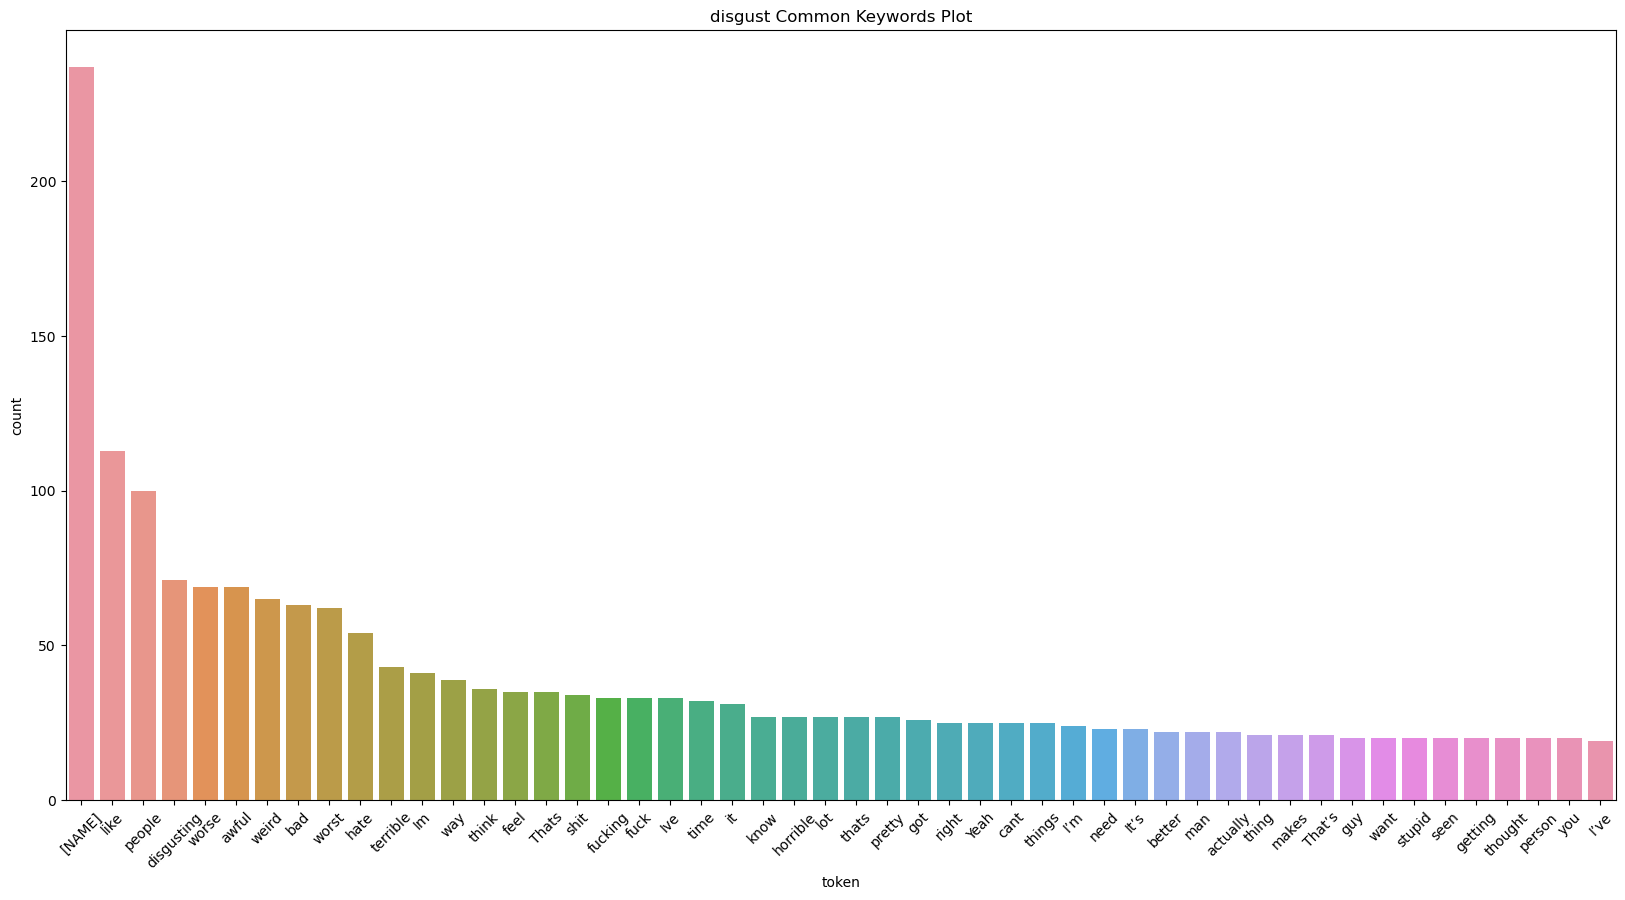

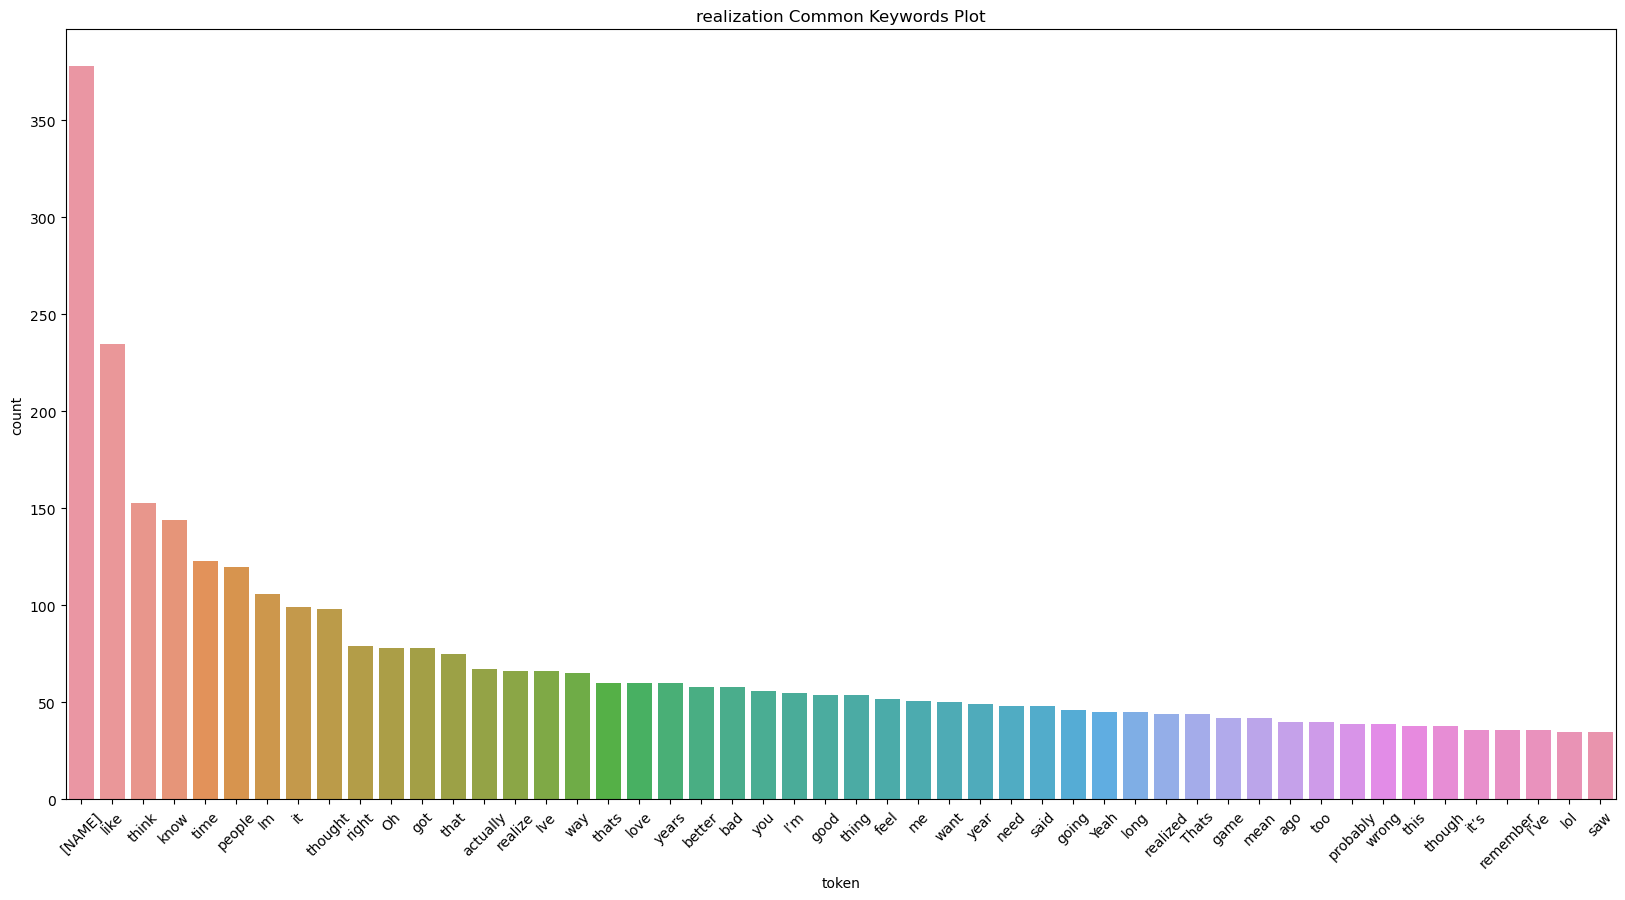

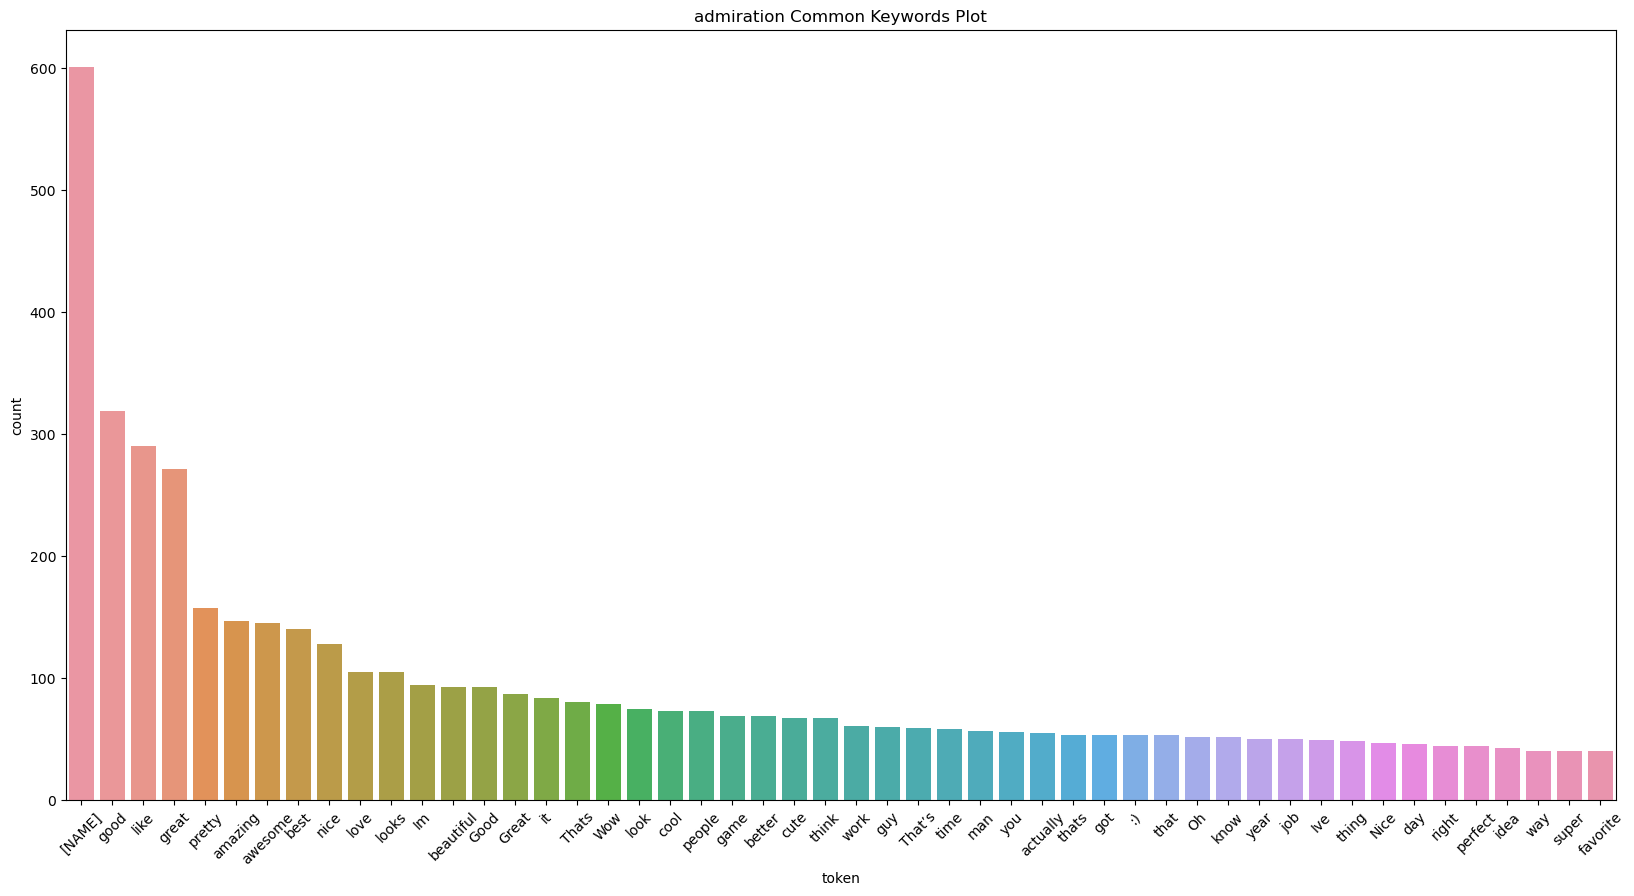

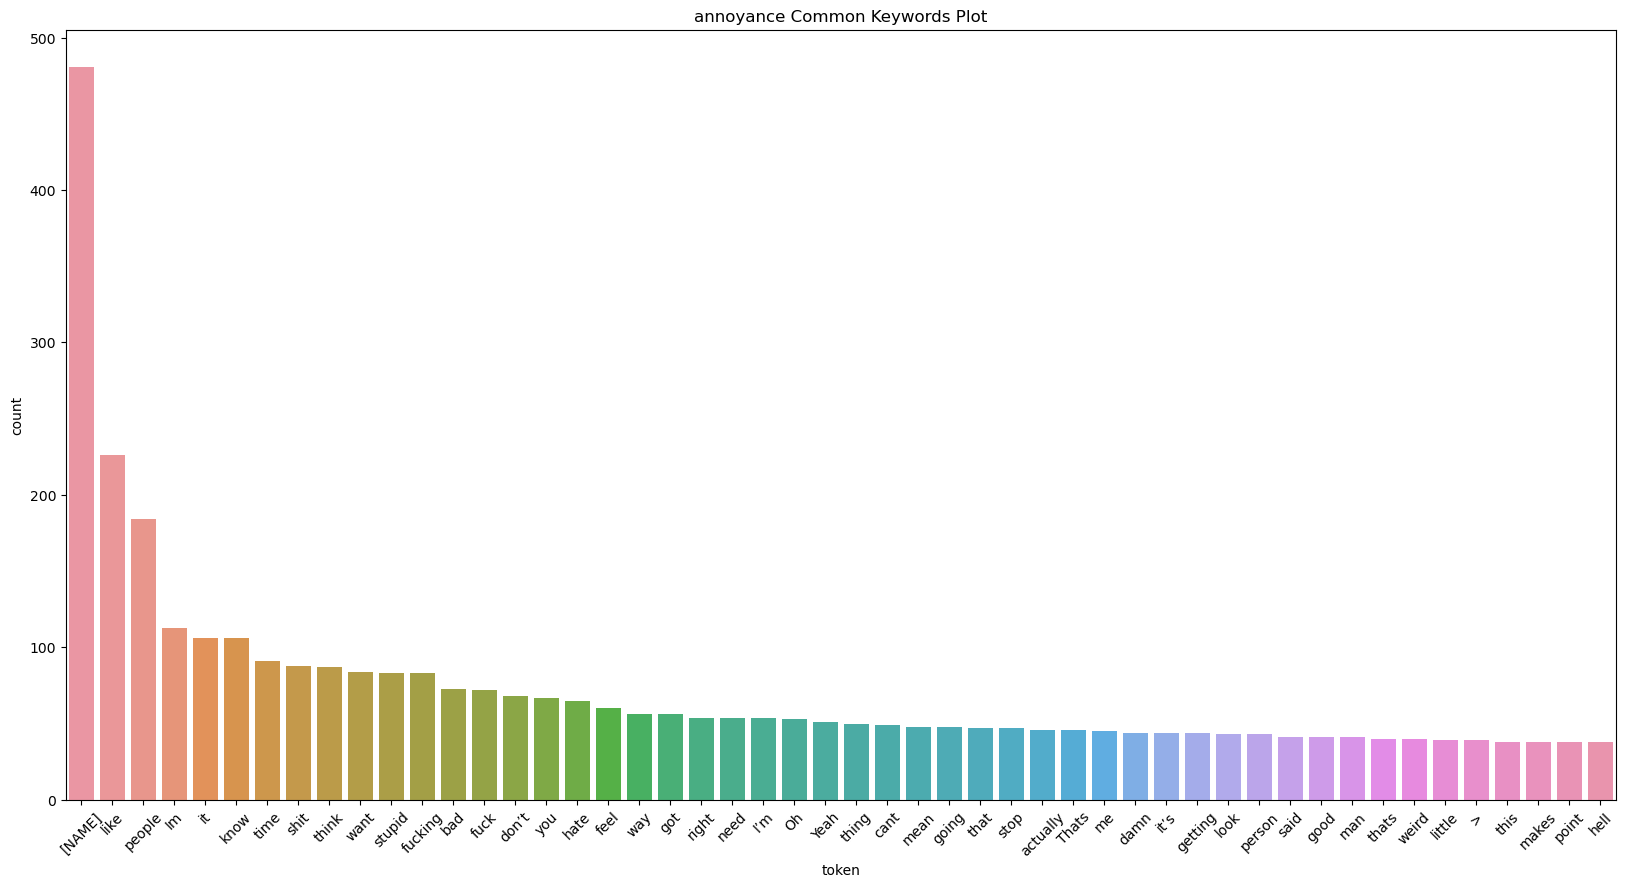

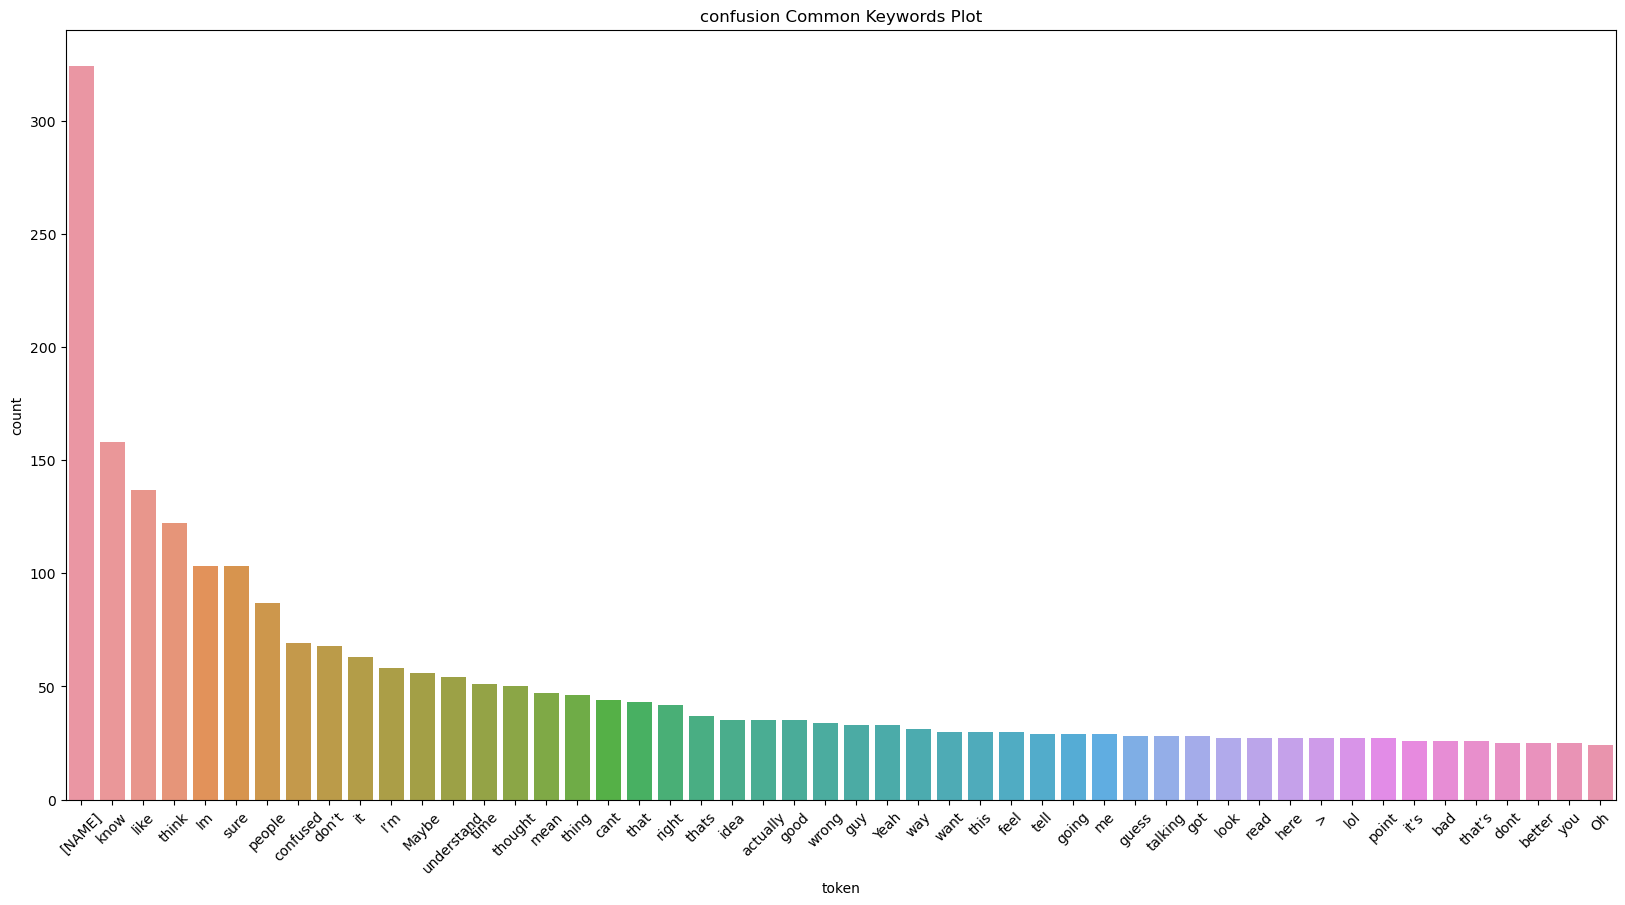

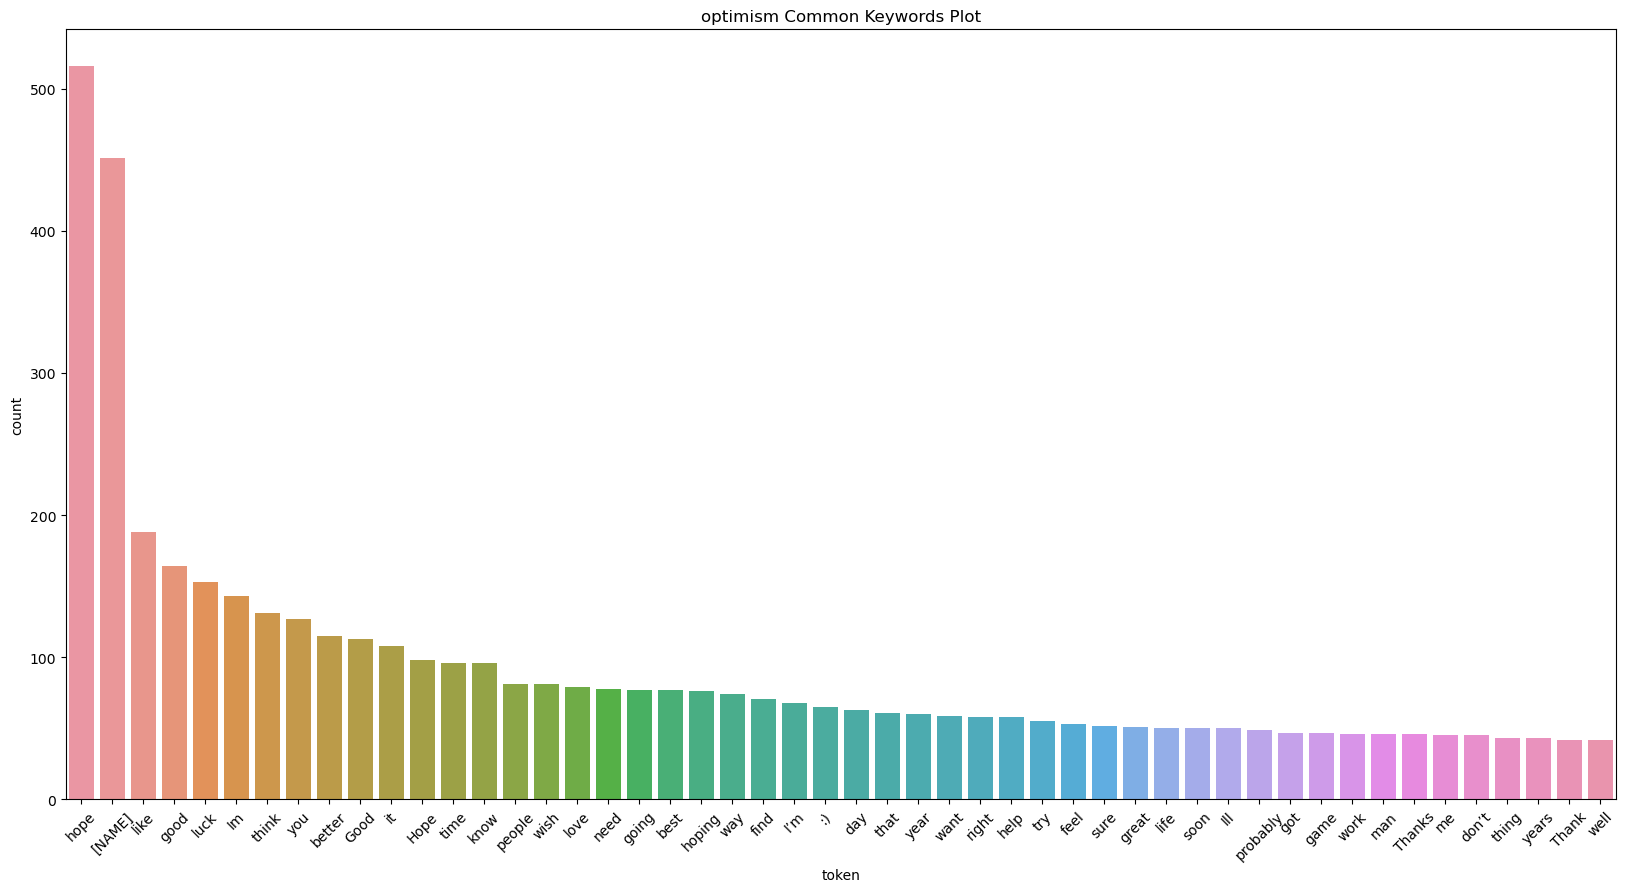

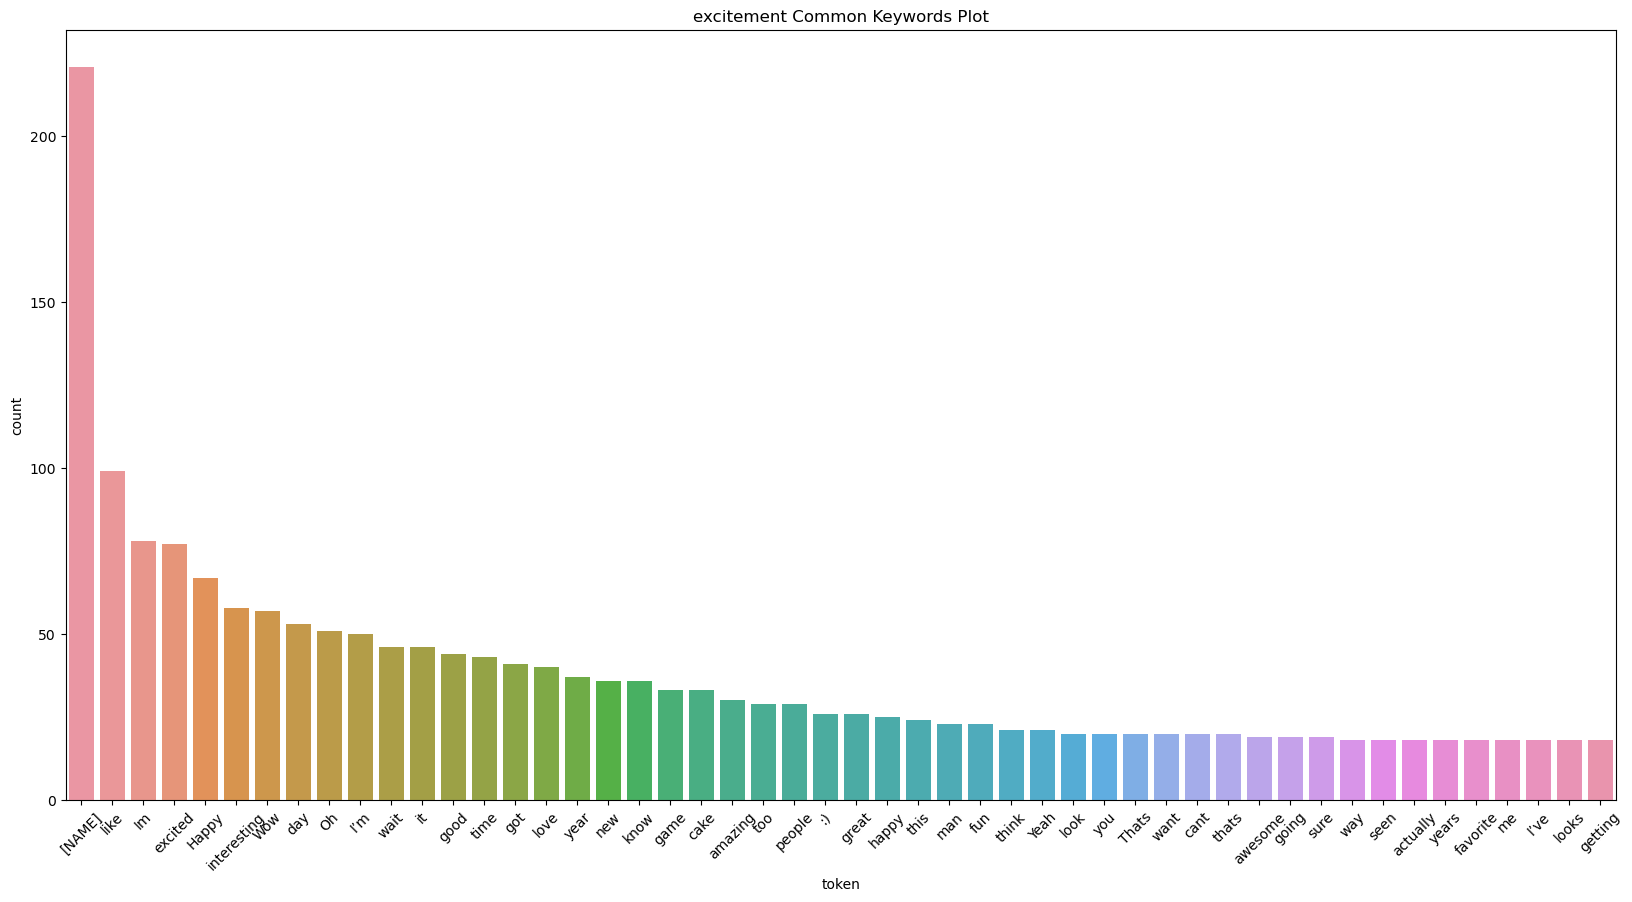

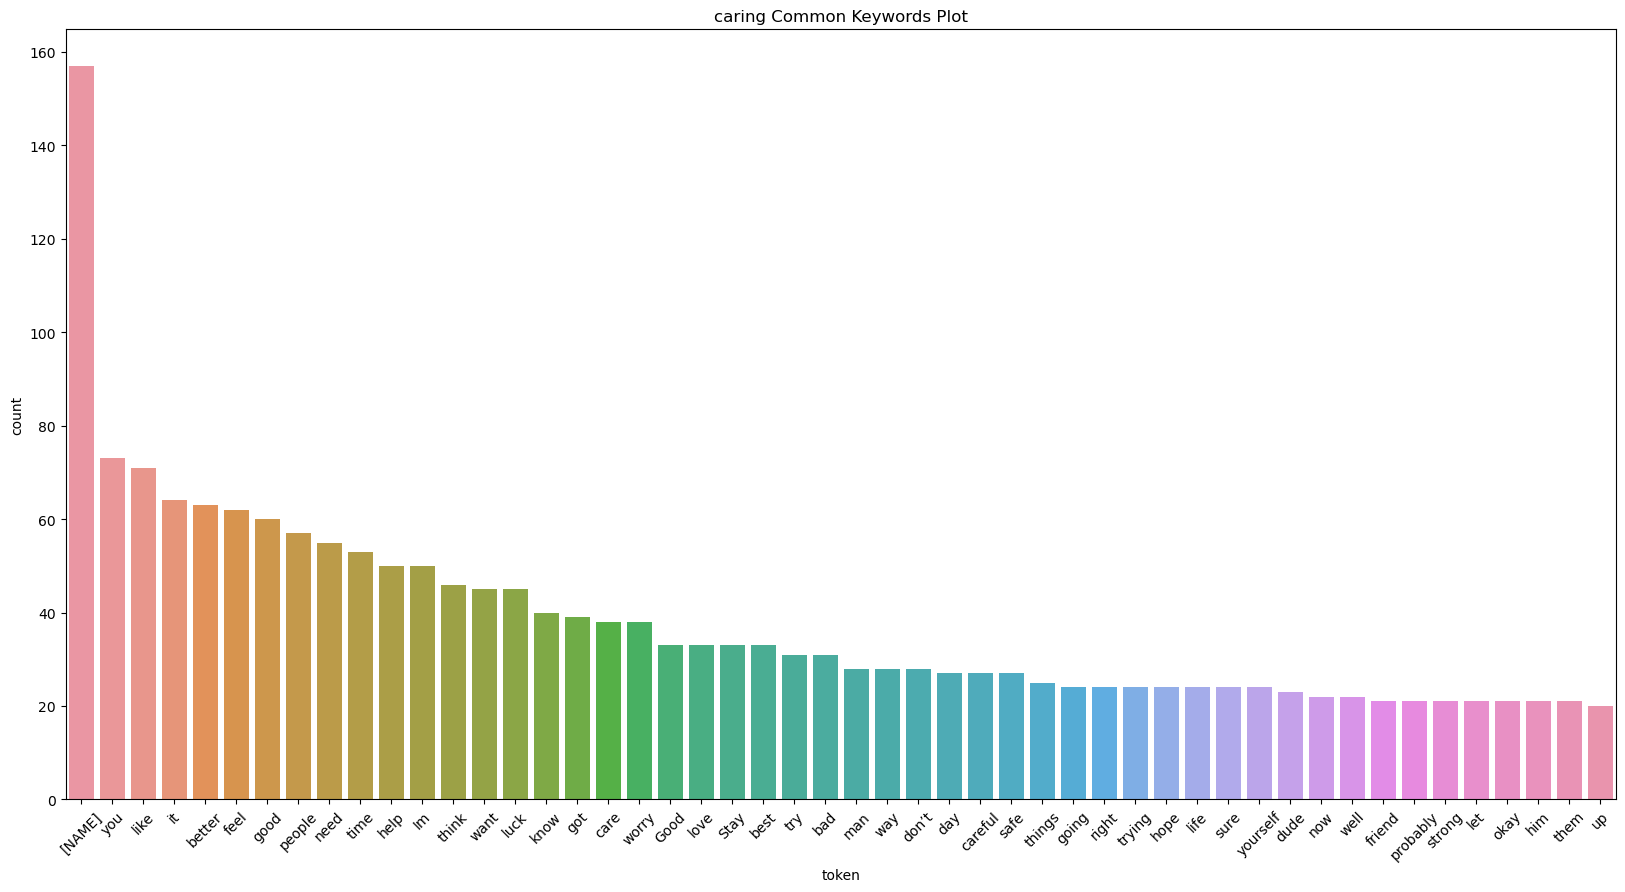

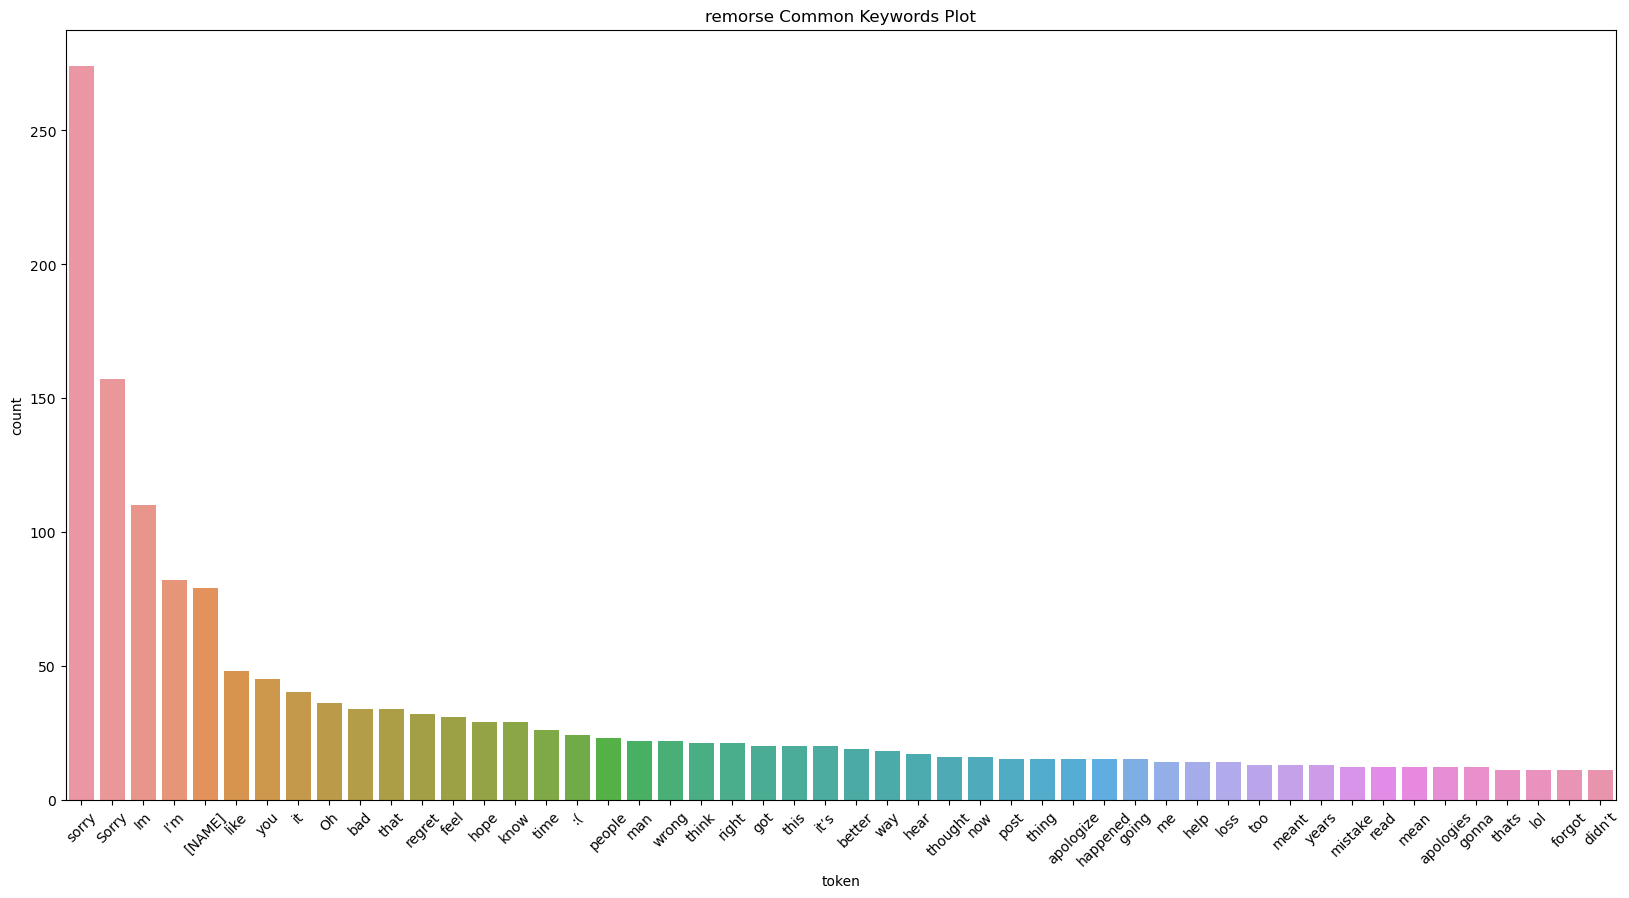

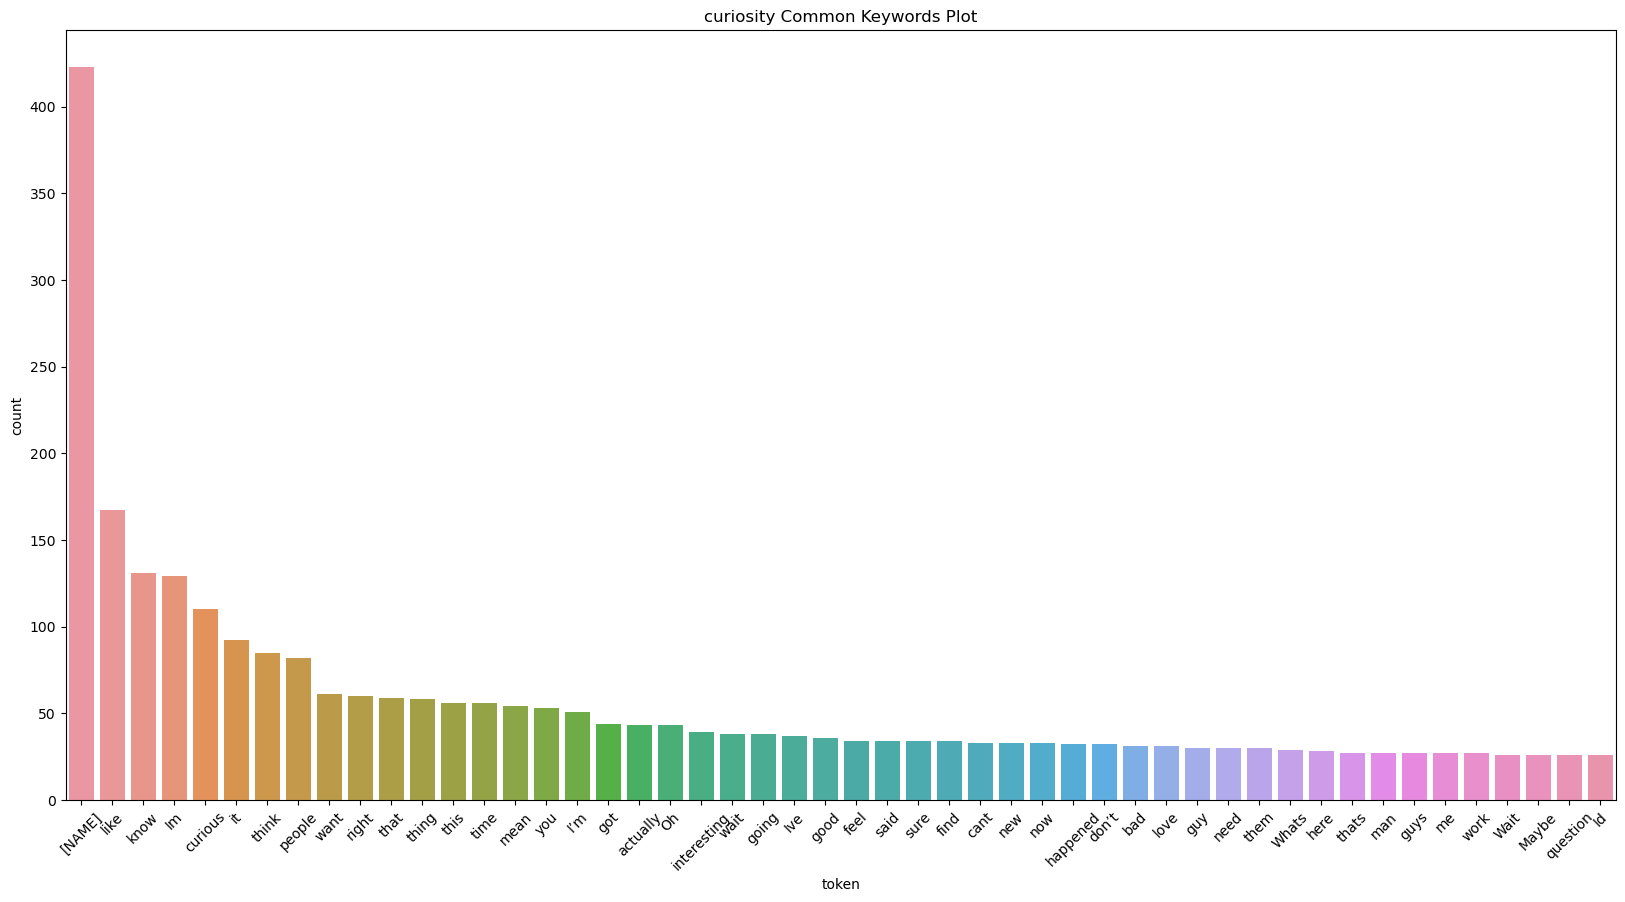

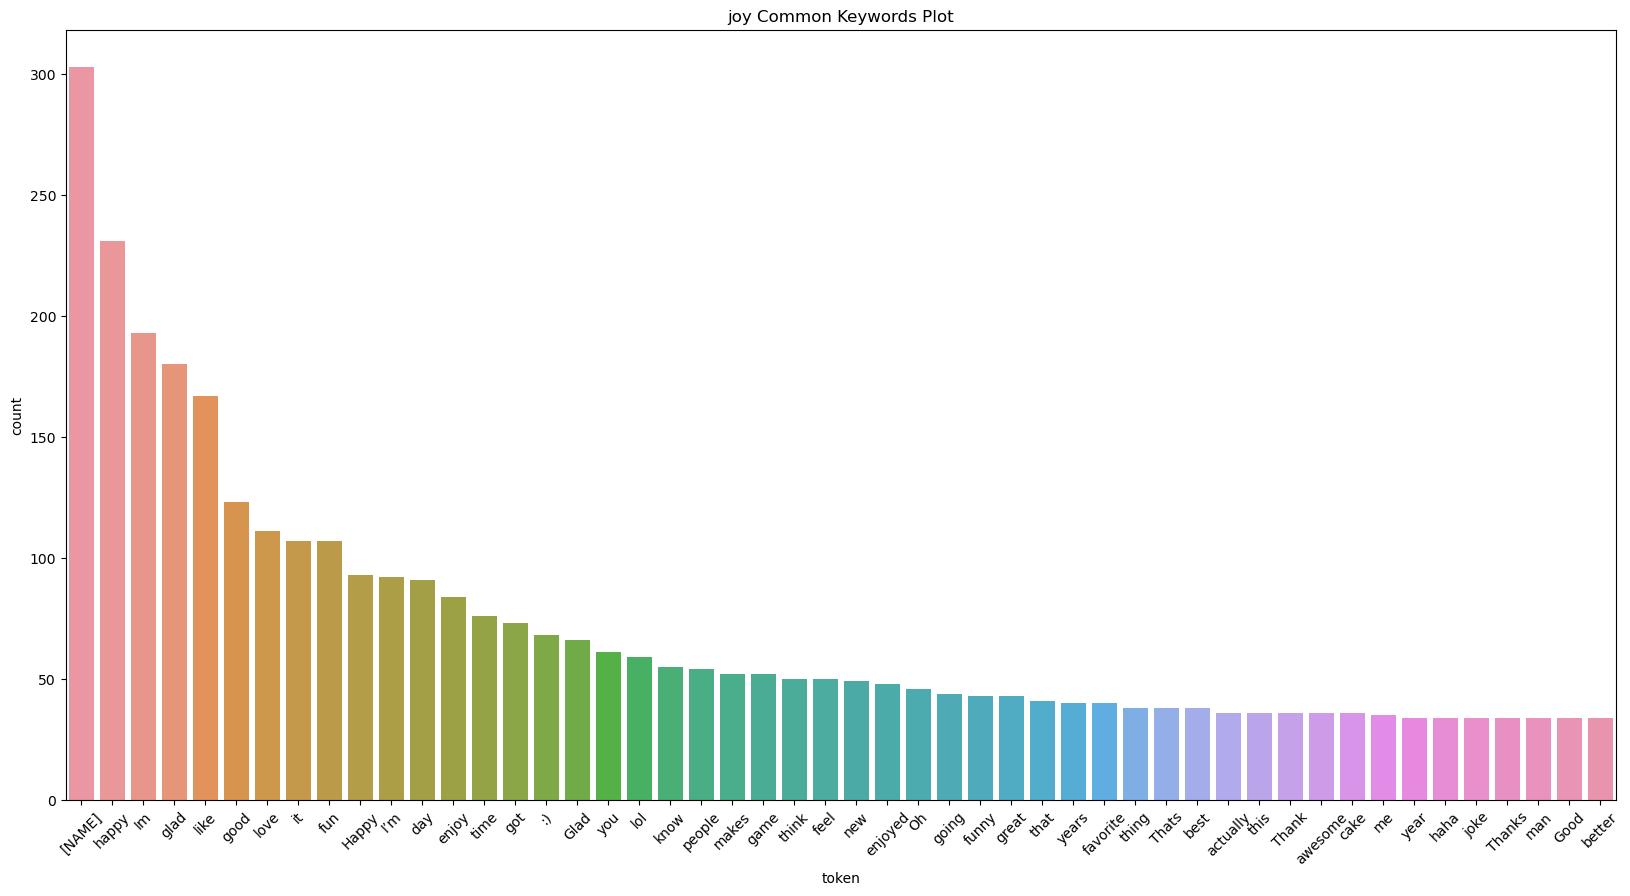

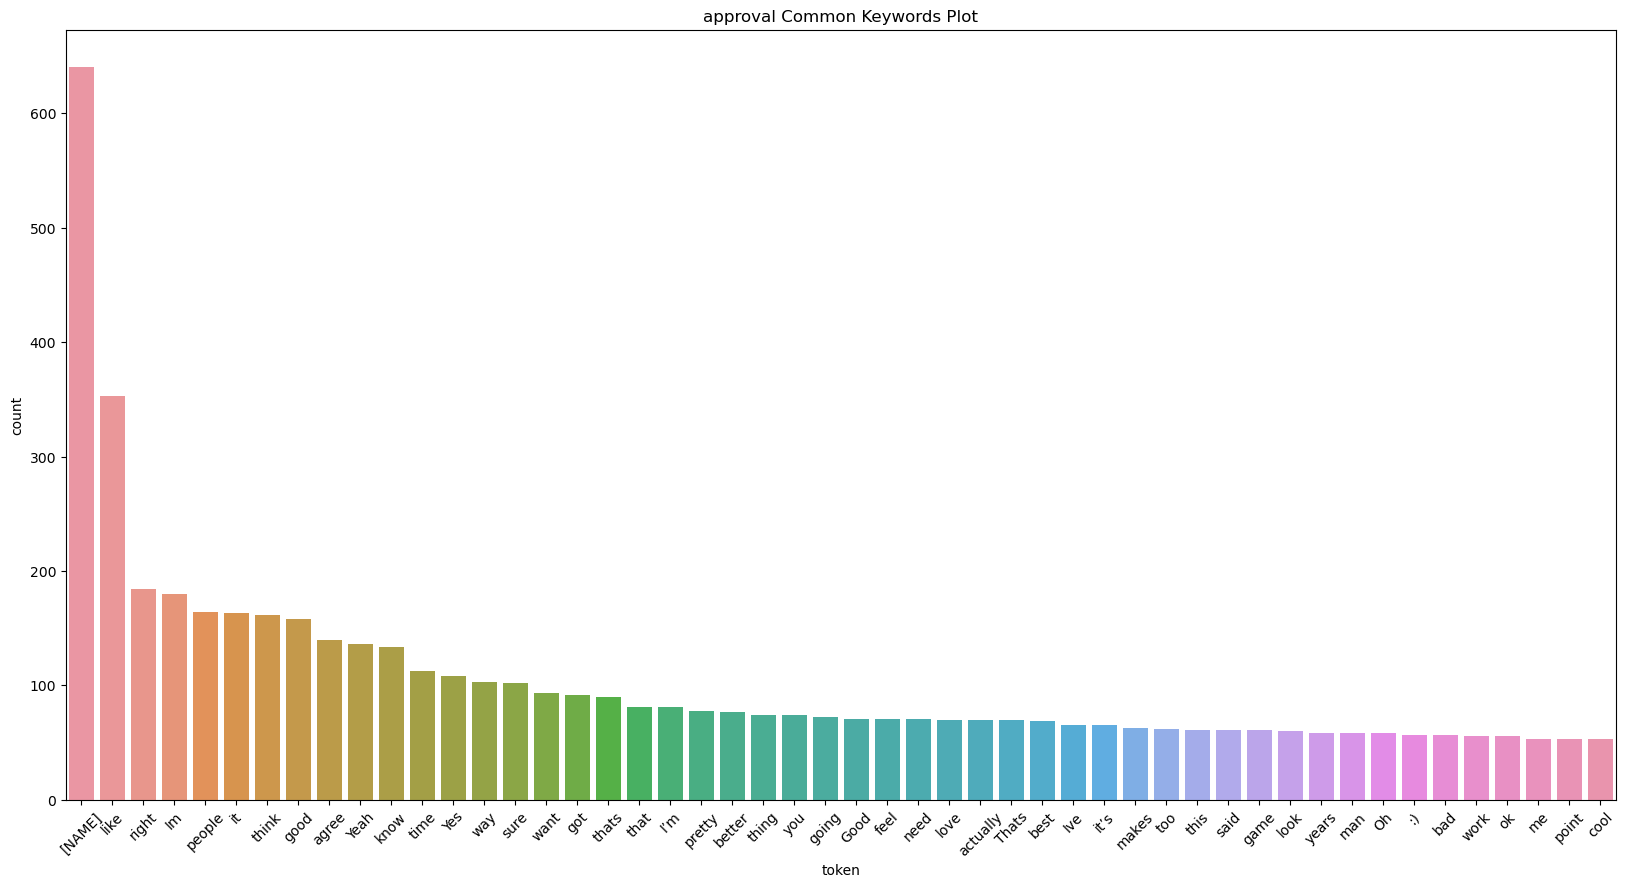

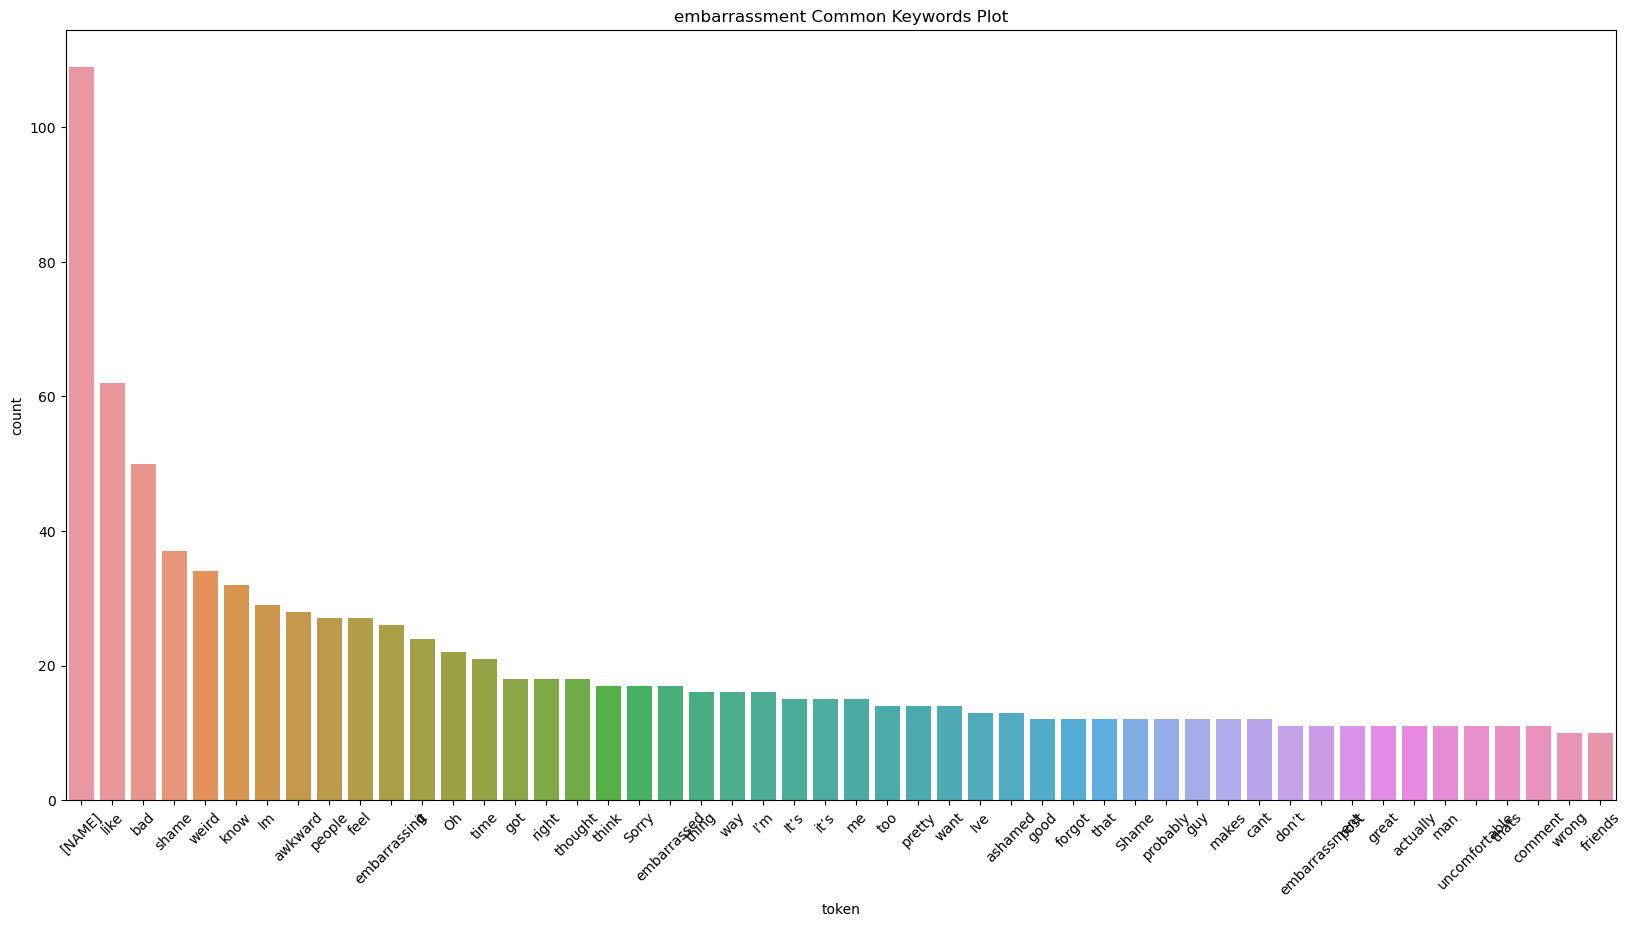

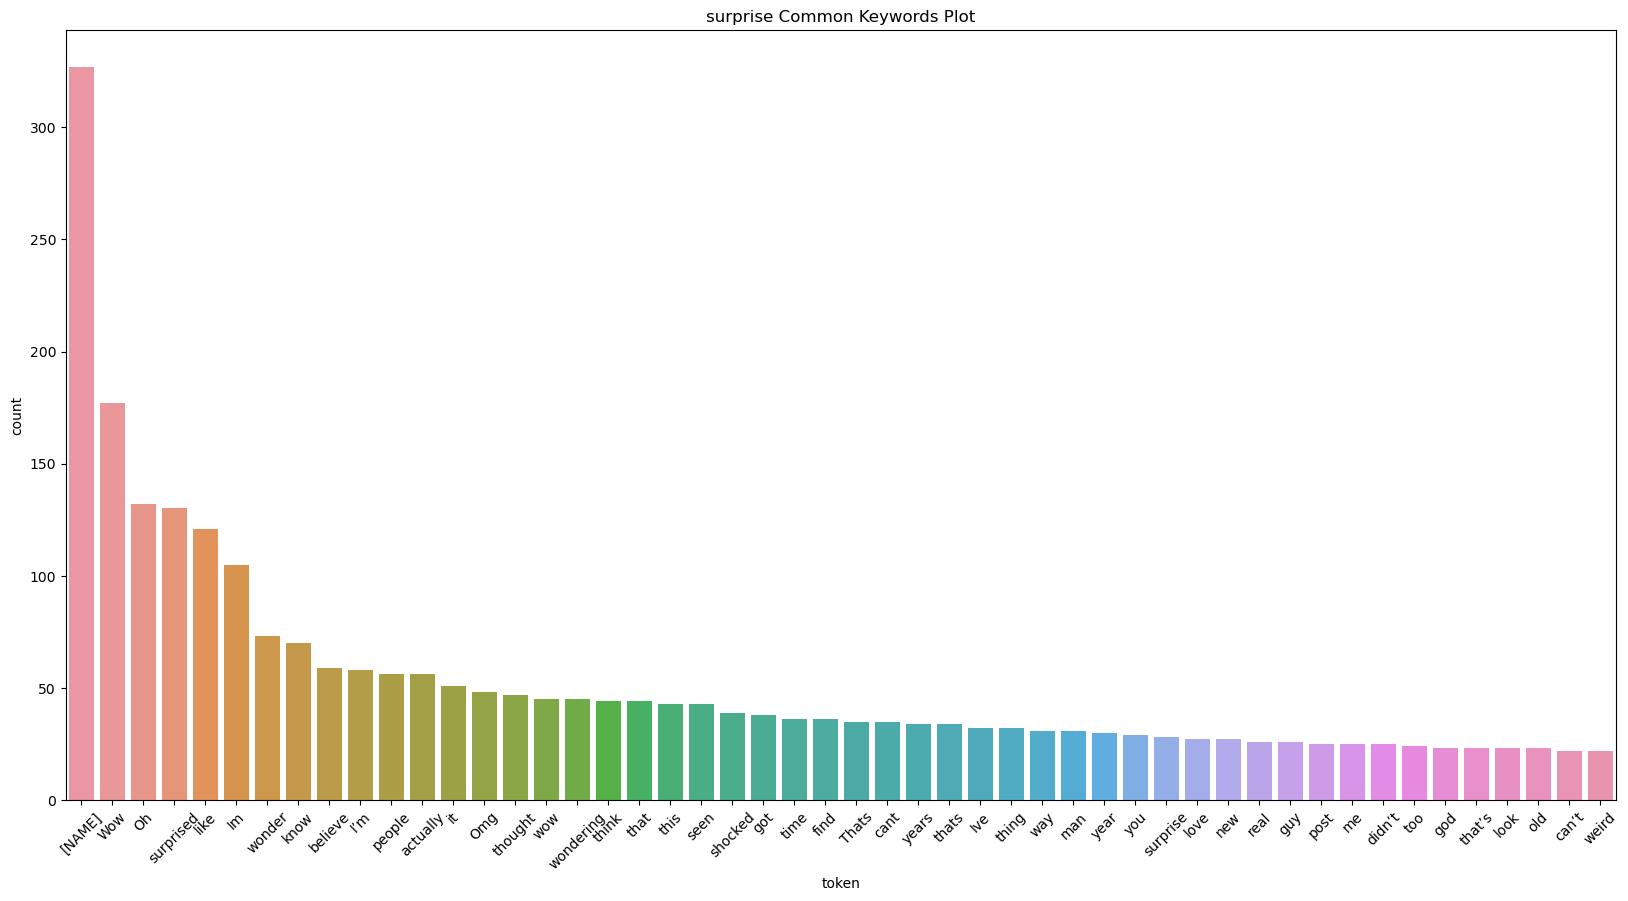

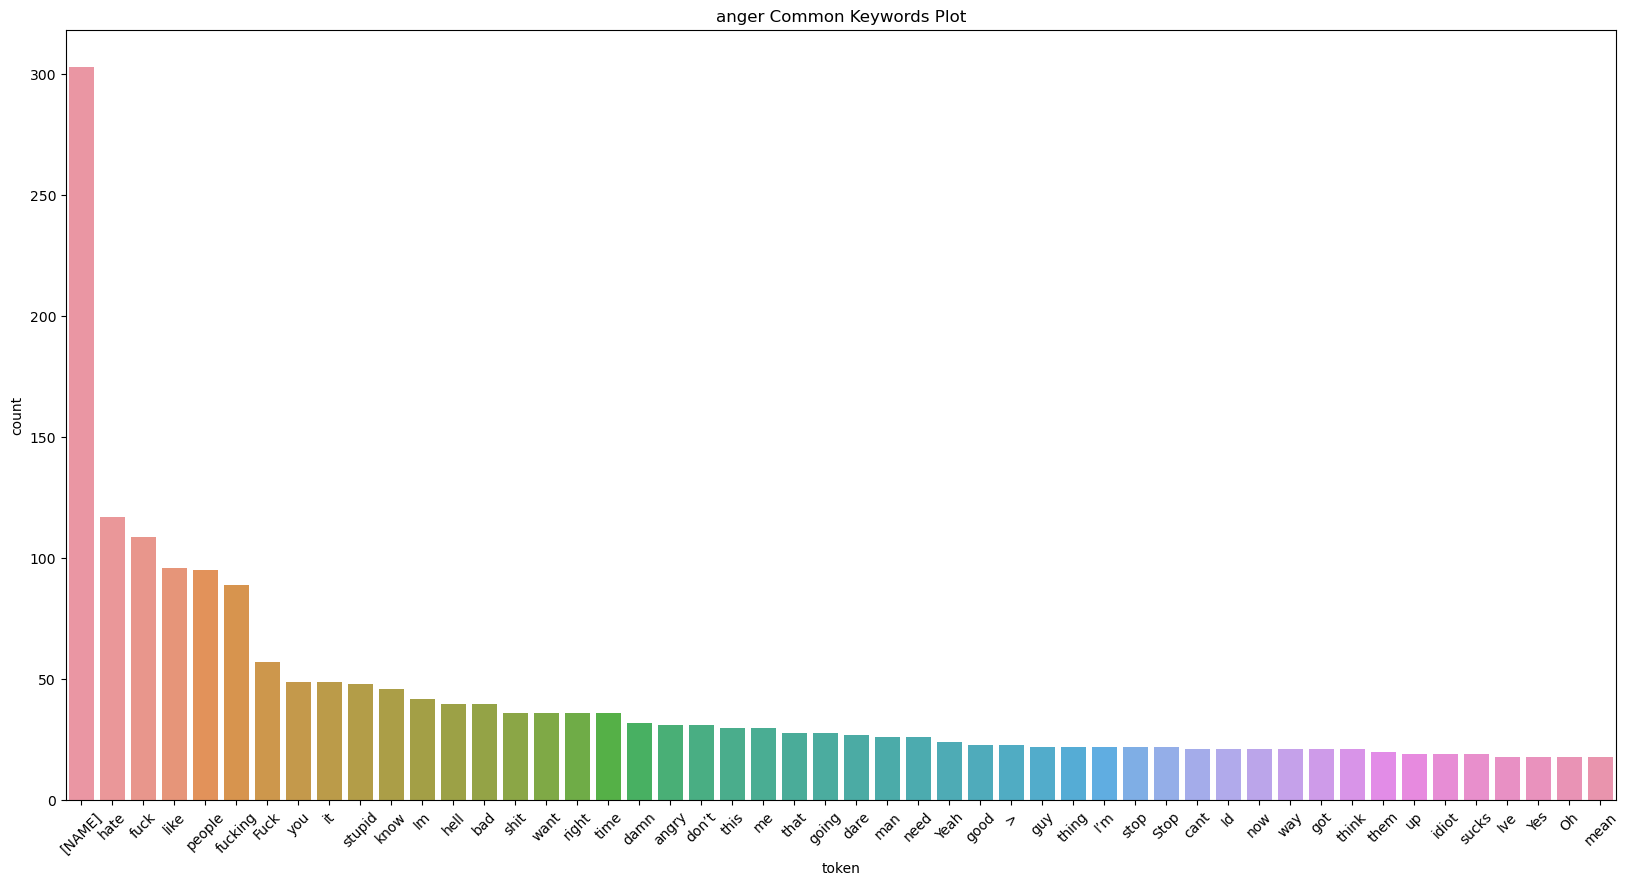

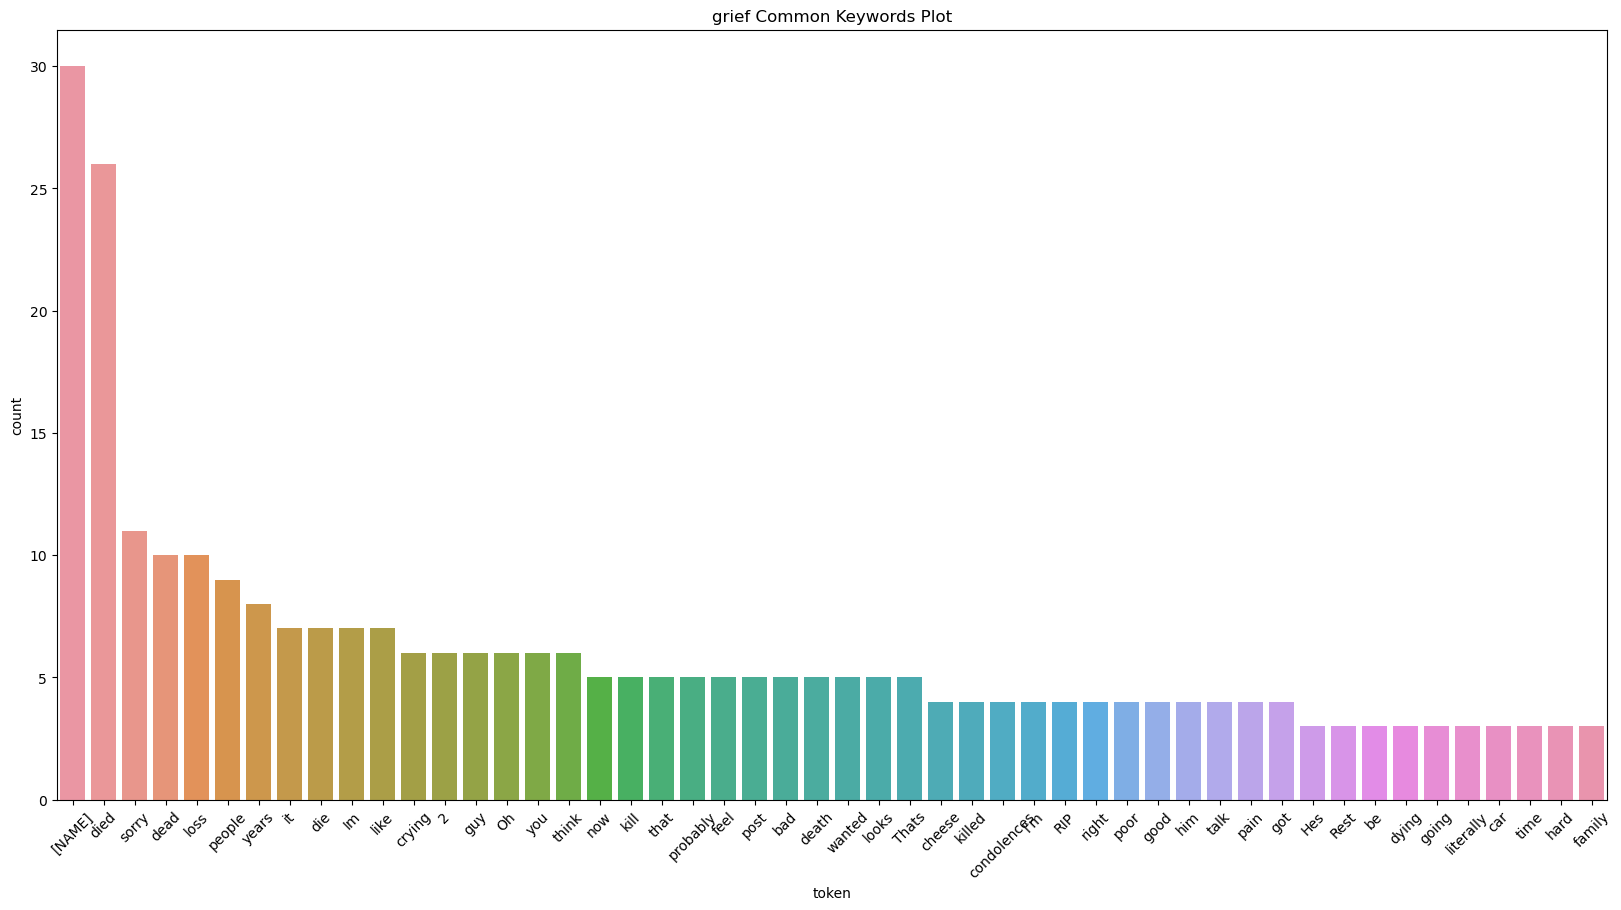

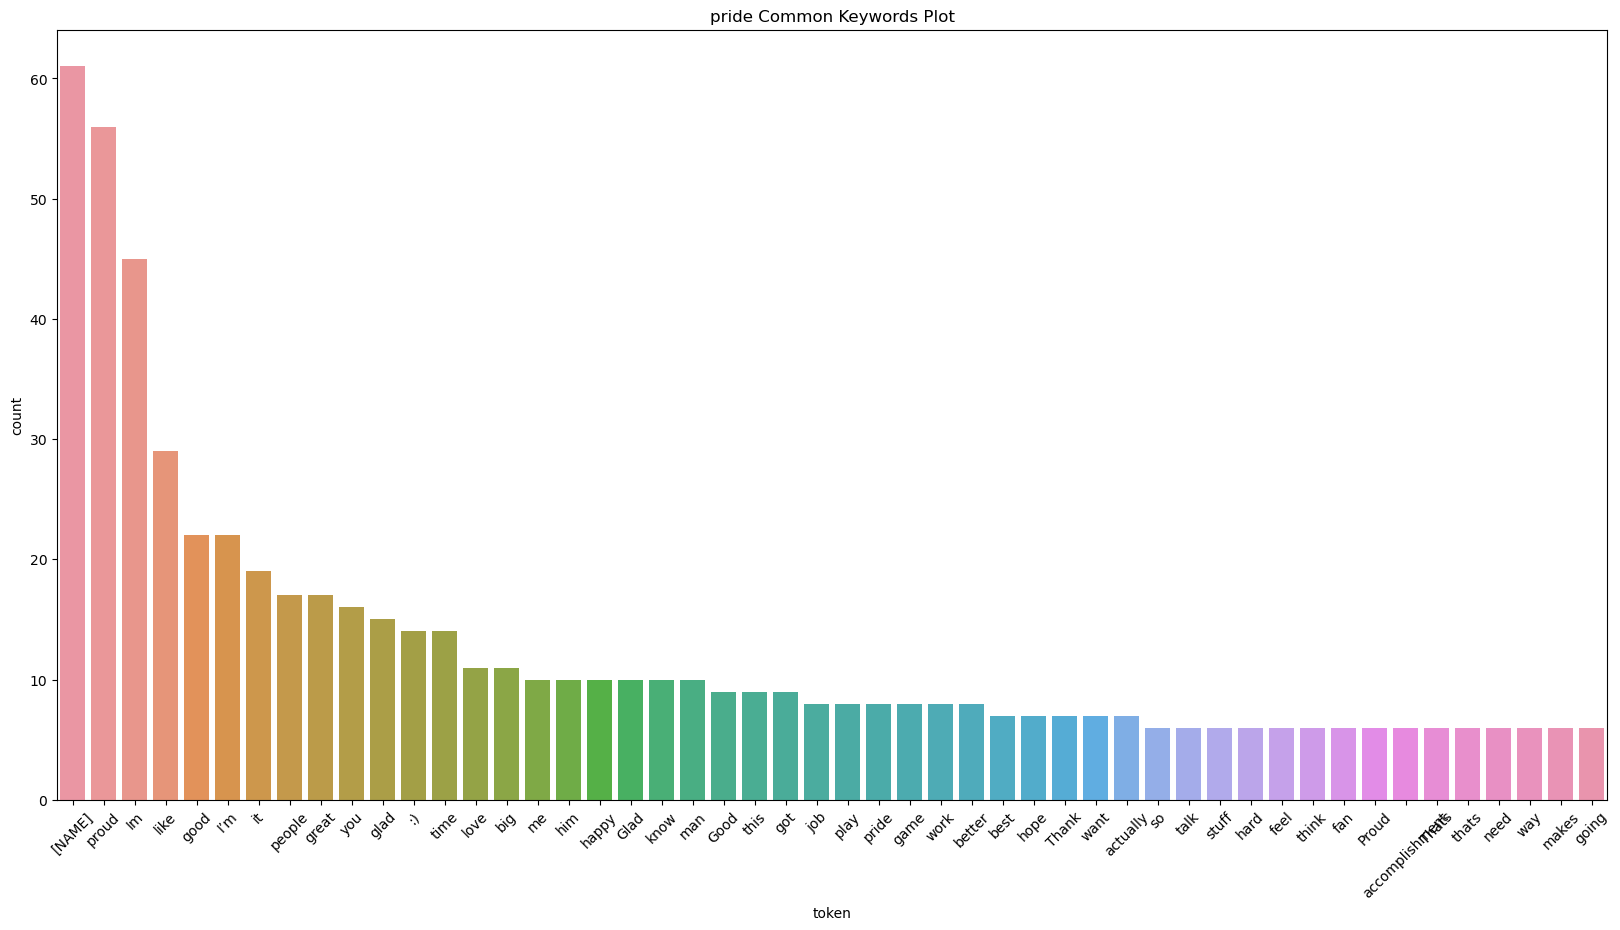

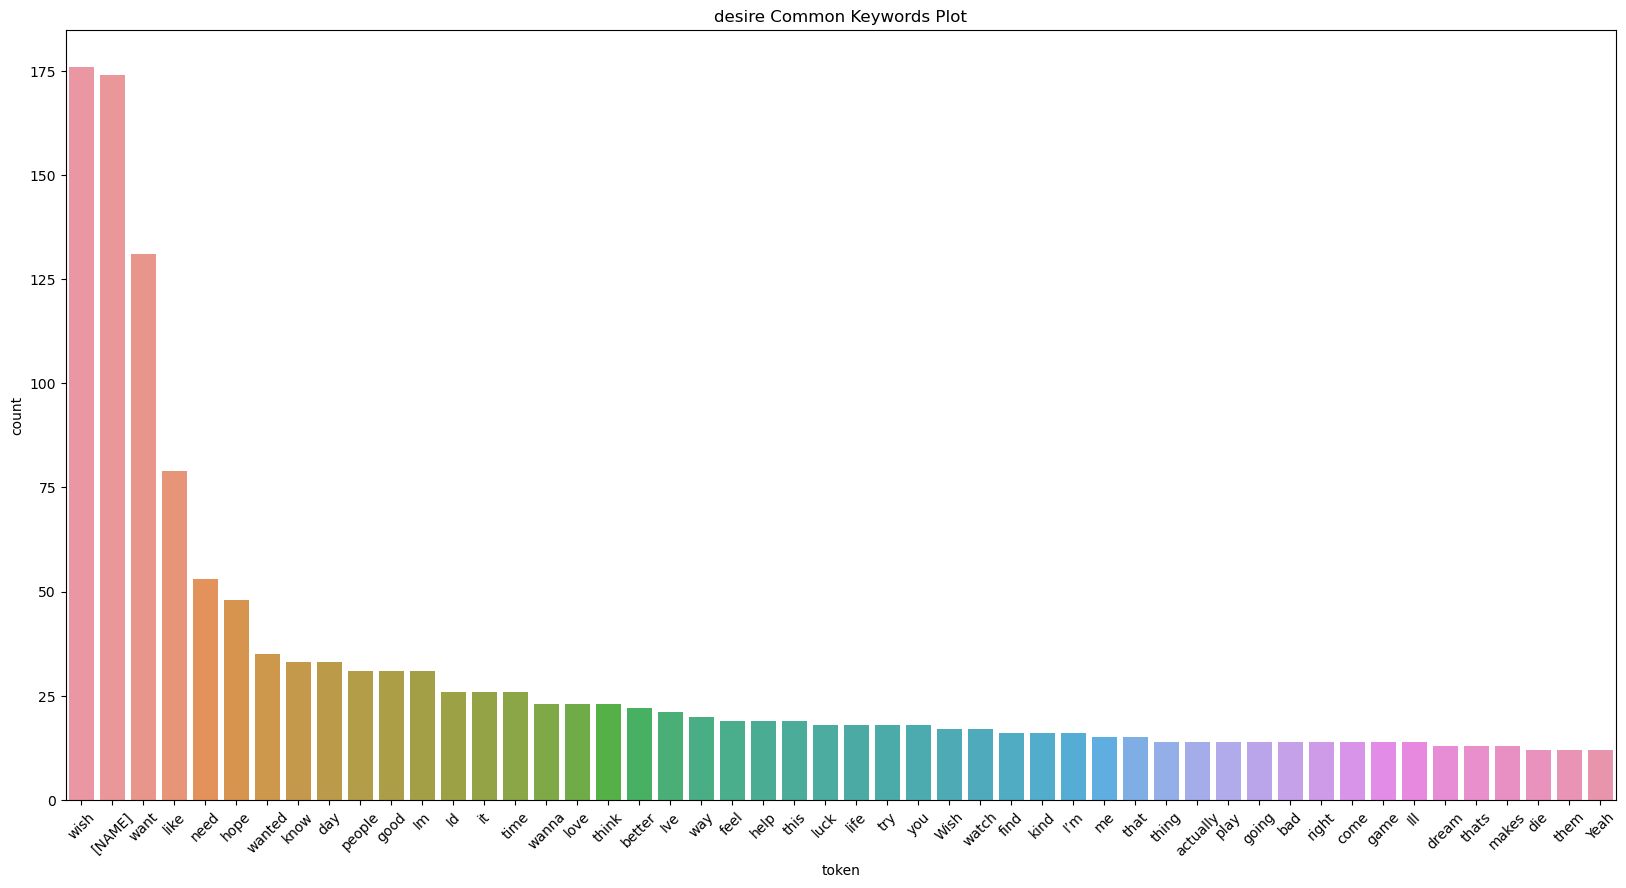

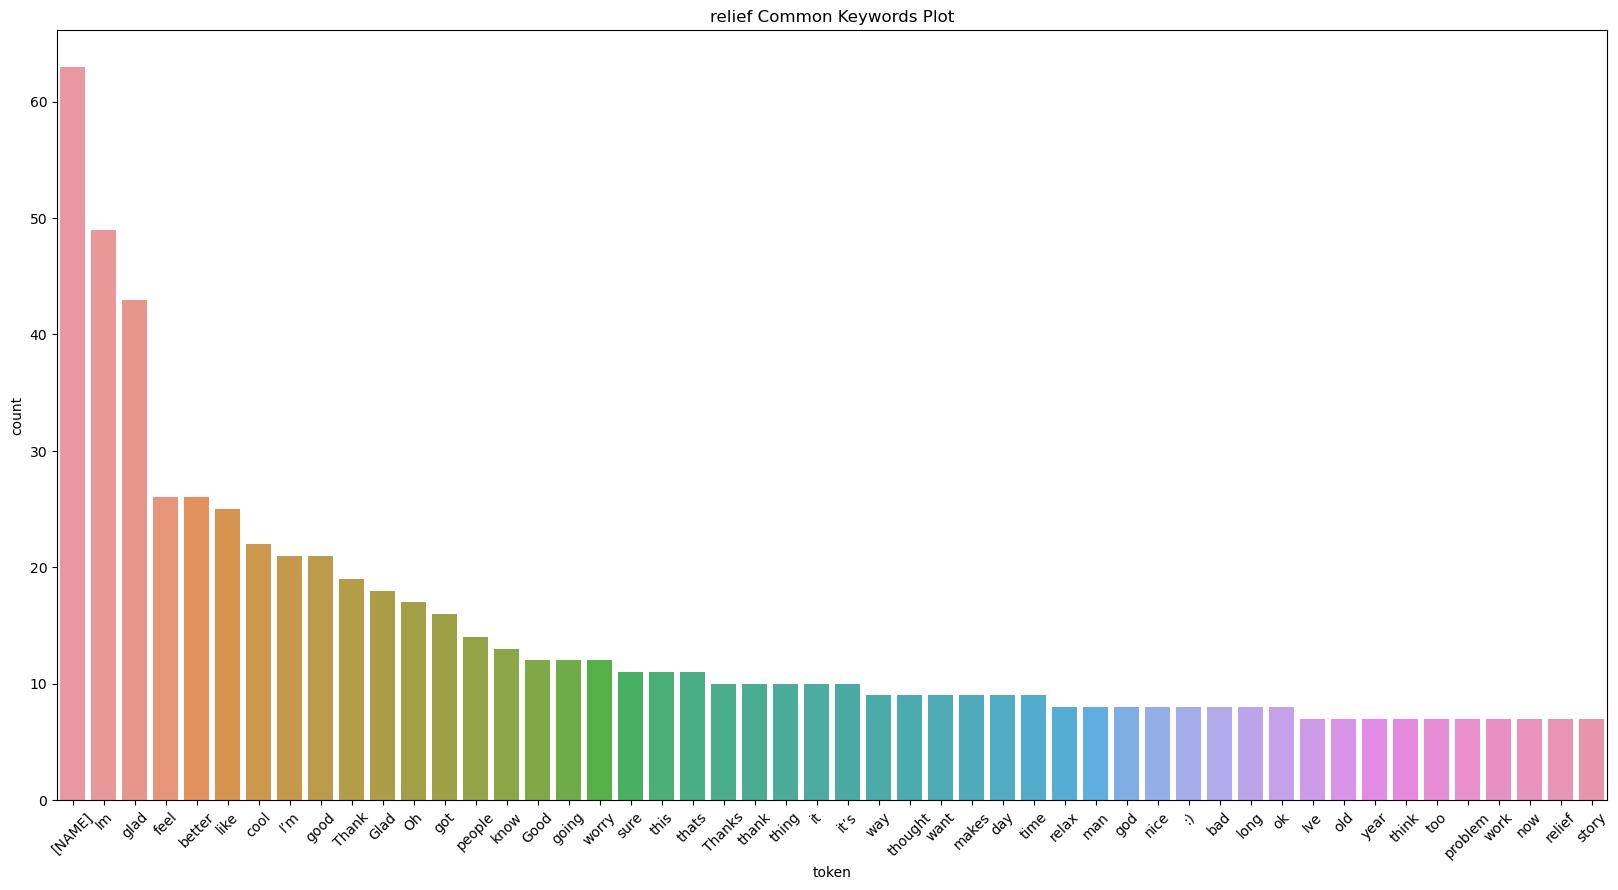

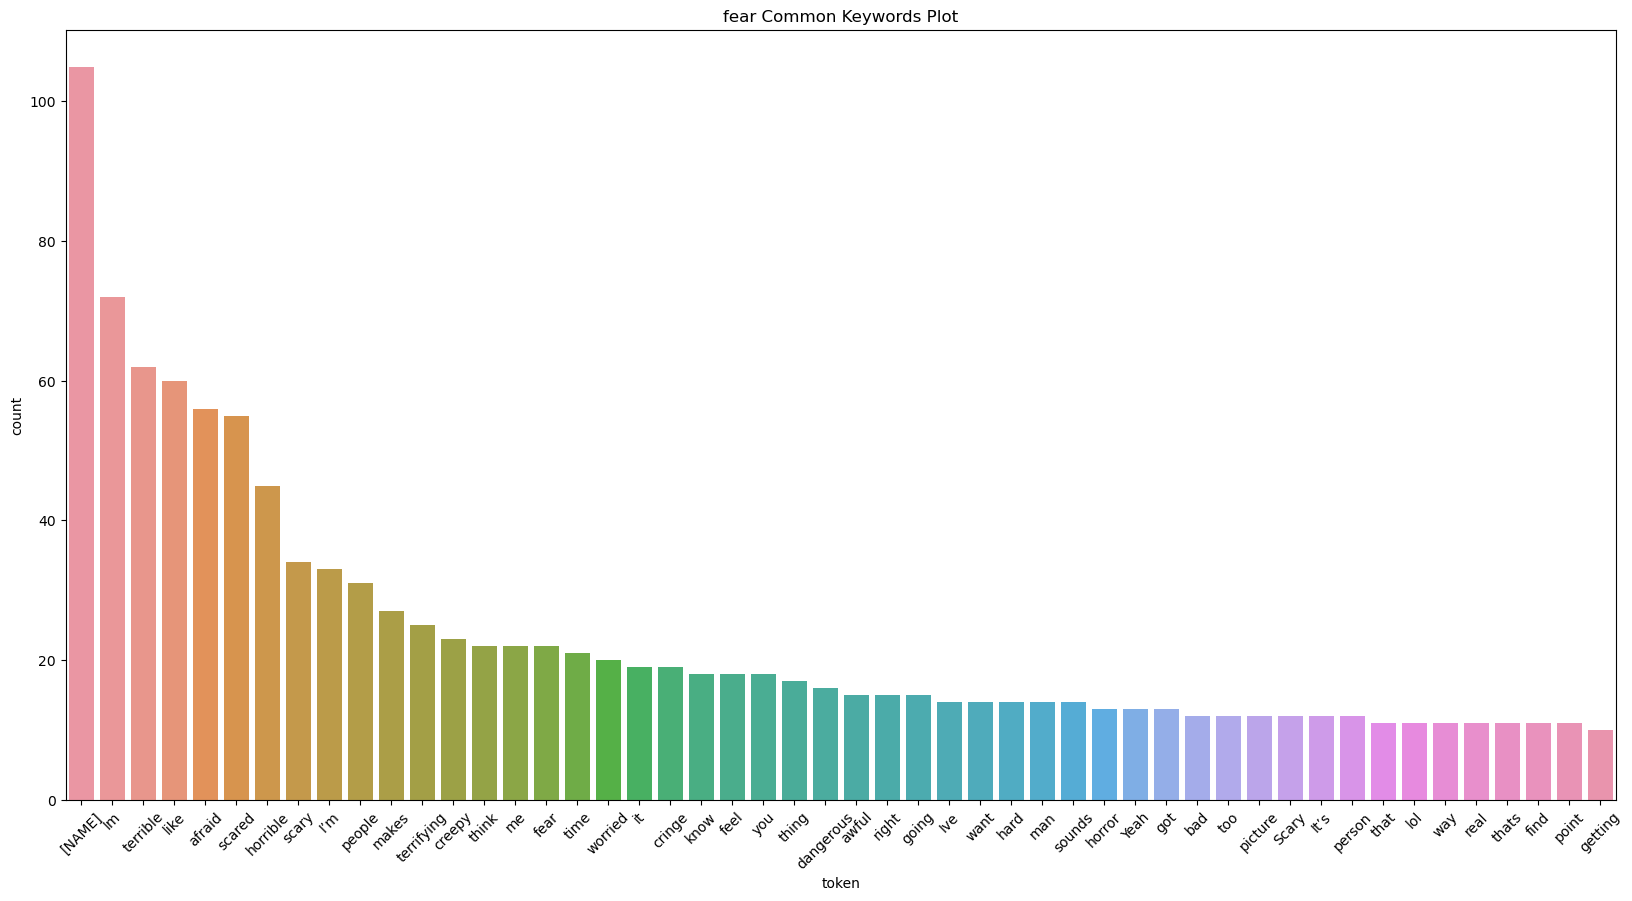

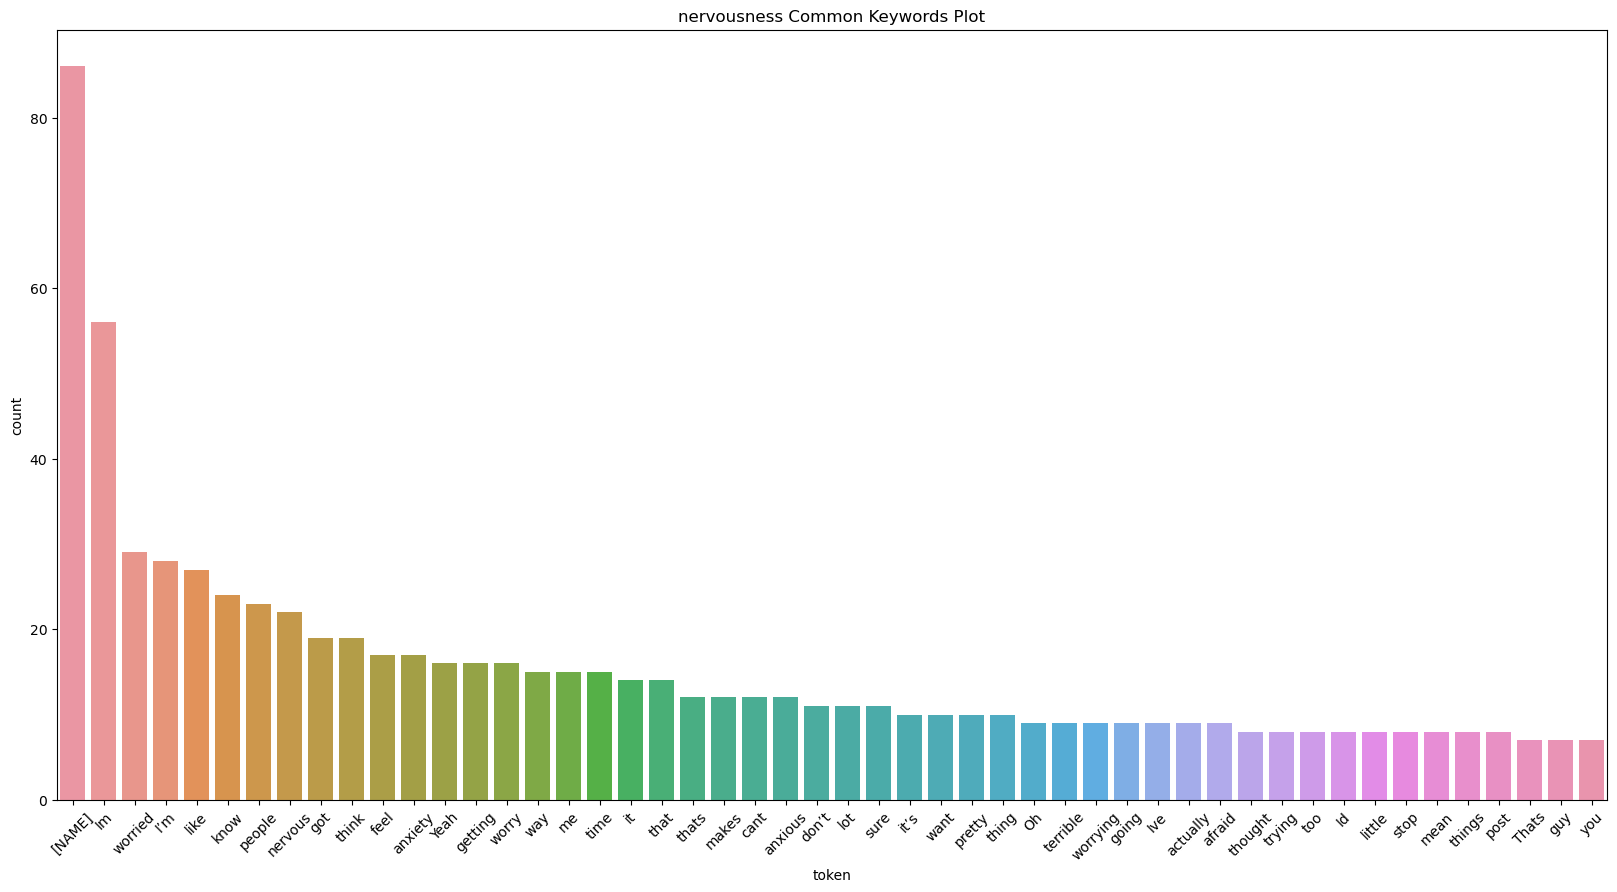

In [129]:
sadnessDict = GetMostCommonWords("sadness", True)
neutralDict = GetMostCommonWords("neutral", True)
loveDict = GetMostCommonWords("love", True)
gratitudeDict = GetMostCommonWords("gratitude", True)
amusementDict = GetMostCommonWords("amusement", True)
disappointmentDict = GetMostCommonWords("disappointment", True)
disgustDict = GetMostCommonWords("disgust", True)
realizationDict = GetMostCommonWords("realization", True)
admirationDict = GetMostCommonWords("admiration", True)
annoyanceDict = GetMostCommonWords("annoyance", True)
confusionDict = GetMostCommonWords("confusion", True)
optimismDict = GetMostCommonWords("optimism", True)
excitementDict = GetMostCommonWords("excitement", True)
caringDict = GetMostCommonWords("caring", True)
remorseDict = GetMostCommonWords("remorse", True)
curiosityDict = GetMostCommonWords("curiosity", True)
joyDict = GetMostCommonWords("joy", True)
approvalDict = GetMostCommonWords("approval", True)
embarrassmentDict = GetMostCommonWords("embarrassment", True)
surpriseDict = GetMostCommonWords("surprise", True)
angerDict = GetMostCommonWords("anger", True)
griefDict = GetMostCommonWords("grief", True)
prideDict = GetMostCommonWords("pride", True)
desireDict = GetMostCommonWords("desire", True)
reliefDict = GetMostCommonWords("relief", True)
fearDict = GetMostCommonWords("fear", True)
nervousnessDict = GetMostCommonWords("nervousness", True)

In [130]:
### Word Cloud
from wordcloud import WordCloud

In [131]:
def plotWordCloud(docx):
    wordCloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Machine Learning
+ Naive Based
+ LogisticRegression
+ KNN
+ Decision Tree

### Compare with SparkNLP/ NLU Snows Lab

In [132]:
# Load Machine Learning Packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# Splitting Data
from sklearn.model_selection import train_test_split

In [133]:
### Build Features from our Text
Xfeatures = data['CleanText']
ylabels = data['emotion']

In [134]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)


In [135]:
# Get Vectors
cv.get_feature_names_out()

array(['00', '000001', '00000100001001001000', ..., 'ᴛʜɪs', 'ᴡᴀsᴛᴇ',
       'ᴡᴀɪᴛ'], dtype=object)

In [136]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X,ylabels,test_size=0.3, random_state=42)

In [138]:
# Build Model

naiveBasedModel = MultinomialNB()
naiveBasedModel.fit(X_train, y_train)

MultinomialNB()

In [139]:
# Accuracy
# method 1
naiveBasedModel.score(X_test, y_test)

0.31715226018778436

In [140]:
# Prediction
yPredictionNaive = naiveBasedModel.predict(X_test)

In [141]:
yPredictionNaive

array(['approval', 'neutral', 'neutral', ..., 'neutral', 'joy', 'neutral'],
      dtype='<U14')

### Make simple prediction
+ Vectorized our text
+ Applied our model

In [186]:
# Test
sampleTxt = ["I hate coding"]

In [187]:
vect = cv.transform(sampleTxt).toarray()

In [188]:
# Make prediction
naiveBasedModel.predict(vect)

array(['neutral'], dtype='<U14')

In [157]:
# Check for the prediction probability (precentage)
# How accurate Confidence score
naiveBasedModel.predict_proba(vect)

array([[4.55279186e-02, 9.49824754e-03, 3.03466239e-03, 1.35695438e-02,
        2.48835090e-02, 7.69921733e-03, 7.42868581e-03, 1.12038313e-02,
        4.05808342e-03, 2.04736738e-03, 9.36459000e-03, 1.74706550e-03,
        8.31769137e-04, 8.27083553e-03, 1.33704341e-03, 1.26057126e-02,
        8.73723442e-05, 3.41253318e-02, 4.64891051e-01, 5.29987032e-04,
        2.60026839e-01, 2.54165623e-02, 1.10469387e-03, 3.46972665e-02,
        3.45669098e-04, 7.56333611e-04, 8.38442547e-03, 6.52638495e-03]])

In [158]:
# Get all the classes for my model
naiveBasedModel.classes_


array(['admiration', 'amusement', 'anger', 'annoyance', 'approval',
       'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
       'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
       'surprise'], dtype='<U14')

In [190]:
np.max(naiveBasedModel.predict_proba(vect))

0.4126111694105375

In [191]:
def predictEmotion(sampleTxt, model):
    vect = cv.transform(sampleTxt).toarray()
    prediction = model.predict(vect)
    probability = model.predict_proba(vect)
    predictionPercentage = dict(zip(model.classes_, probability[0]))
    print("Prediction:\t\t{}\nPrediction Score:\t{}\n".format(prediction[0], np.max(probability)))
    return predictionPercentage
    

In [192]:
sampleTxt = ["I hate you"]

predictEmotion(sampleTxt, naiveBasedModel)

Prediction:		neutral
Prediction Score:	0.44134508714919984



{'admiration': 0.013890619124524994,
 'amusement': 0.003011126230830495,
 'anger': 0.08246108987248853,
 'annoyance': 0.07773976283274603,
 'approval': 0.034360901399477416,
 'caring': 0.008678397251242715,
 'confusion': 0.00820257282688328,
 'curiosity': 0.016349688612392405,
 'desire': 0.0007254643421003558,
 'disappointment': 0.007139601034495086,
 'disapproval': 0.07903826203655959,
 'disgust': 0.01566613323753829,
 'embarrassment': 0.0009643400535527358,
 'excitement': 0.001937448128941307,
 'fear': 0.0002595112336572794,
 'gratitude': 0.0895456489697492,
 'grief': 1.9784789350789107e-05,
 'joy': 0.0062513931876249495,
 'love': 0.04027758893857807,
 'nervousness': 0.00010801030564662841,
 'neutral': 0.44134508714919984,
 'optimism': 0.03417151462384486,
 'pride': 0.0003668857192879341,
 'realization': 0.008881743272772967,
 'relief': 5.218272330449902e-05,
 'remorse': 0.003219798490420061,
 'sadness': 0.020108524239359275,
 'surprise': 0.005226919373430856}

In [6]:
predictEmotion(["There shouldve only been two of you that played. Now only one can go."], naiveBasedModel)

NameError: name 'predictEmotion' is not defined

### Model Evaluation

In [172]:
# Classification
print(classification_report(y_test, yPredictionNaive))

/Users/nickq/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nickq/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    admiration       0.38      0.22      0.28       991
     amusement       0.45      0.13      0.20       652
         anger       0.25      0.03      0.05       548
     annoyance       0.17      0.04      0.06       958
      approval       0.19      0.05      0.08      1336
        caring       0.25      0.02      0.03       426
     confusion       0.24      0.02      0.03       538
     curiosity       0.28      0.04      0.07       770
        desire       0.12      0.01      0.01       274
disappointment       0.23      0.02      0.03       582
   disapproval       0.18      0.04      0.06       938
       disgust       0.41      0.05      0.10       438
 embarrassment       0.33      0.00      0.01       201
    excitement       0.24      0.02      0.03       397
          fear       0.29      0.02      0.04       212
     gratitude       0.71      0.65      0.68      1017
         grief       0.00      0.00      0.00  

/Users/nickq/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
# Confusion Matrix
confusion_matrix(y_test, yPredictionNaive)

array([[ 216,    2,    0,    1,   15,    0,    0,    0,    0,    0,    2,
           1,    0,    2,    0,   24,    0,   14,   22,    0,  674,   13,
           0,    0,    0,    0,    0,    5],
       [  11,   85,    0,    1,    7,    0,    2,    1,    0,    0,    3,
           0,    0,    0,    0,   11,    0,   12,    4,    0,  507,    3,
           0,    1,    0,    0,    1,    3],
       [   2,    4,   15,   23,    2,    0,    1,    1,    0,    0,   10,
           2,    0,    0,    0,    1,    0,    0,    2,    0,  478,    4,
           0,    1,    0,    0,    2,    0],
       [   5,    6,   12,   34,   16,    0,    0,    3,    0,    3,   17,
           7,    0,    0,    0,    7,    0,    1,    3,    0,  832,    3,
           0,    4,    0,    0,    2,    3],
       [  40,    4,    1,   10,   70,    4,    2,    2,    1,    2,   10,
           0,    1,    3,    0,   12,    0,    7,   14,    0, 1128,    5,
           0,    9,    0,    1,    7,    3],
       [   2,    0,    0,    2,    

/Users/nickq/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2000x1000 with 0 Axes>

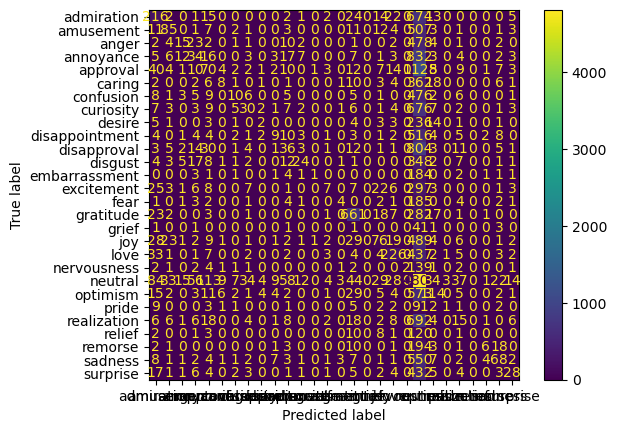

<Figure size 2000x1000 with 0 Axes>

In [198]:
plot_confusion_matrix(naiveBasedModel, X_test, y_test)
plt.figure(figsize=(20,10))


In [175]:
### Save Model

In [176]:
import joblib
import os

In [179]:
joblib.dump(naiveBasedModel, "Models/EmotionNaiveBasedModel-01-30-23.pkl")

['Models/EmotionNaiveBasedModel-01-30-23.pkl']

### Model Interpretation
+ Eli5
+ Lime
+ Shap

In [180]:
# LogisticRegression Model
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

/Users/nickq/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [181]:
# Accuracy
LRmodel.score(X_test,y_test)

0.36840576904462297

In [182]:
# Single Prediction
sampleTxt = ["Nah bro i am angry"]
predictEmotion(sampleTxt, LRmodel)
predictEmotion(sampleTxt, naiveBasedModel)

Prediction:		neutral
Prediction Score:	0.25146186732875914

Prediction:		neutral
Prediction Score:	0.7523442676245853



{'admiration': 0.019792092183468585,
 'amusement': 0.0022373434996159486,
 'anger': 0.008779419370284198,
 'annoyance': 0.025514928793327445,
 'approval': 0.03905499914285379,
 'caring': 0.0036177903787551285,
 'confusion': 0.0020357267727918217,
 'curiosity': 0.000951153317417079,
 'desire': 0.0003115234945502896,
 'disappointment': 0.010005055992475103,
 'disapproval': 0.05825790860522457,
 'disgust': 0.00097861990288291,
 'embarrassment': 0.00034742243177801954,
 'excitement': 0.0005156035699641117,
 'fear': 6.48304482998044e-05,
 'gratitude': 0.009287860831774051,
 'grief': 3.617435487041056e-05,
 'joy': 0.012330506430930342,
 'love': 0.0018105586406449194,
 'nervousness': 0.00014629702681782822,
 'neutral': 0.7523442676245853,
 'optimism': 0.029633489657521567,
 'pride': 0.00018612191281469154,
 'realization': 0.007778738658450171,
 'relief': 6.547952474114675e-05,
 'remorse': 0.0005120189463968864,
 'sadness': 0.012871921706826073,
 'surprise': 0.0005321467799343414}

In [183]:
# Interpret Model
import eli5

In [184]:
# Show the weight for each class/label
eli5.show_weights(LRmodel, top=20)

In [185]:
classNames = ylabels.unique().tolist()
featureNames =cv.get_feature_names()
eli5.show_weights(LRmodel, feature_names=featureNames, target_names=classNames)

/Users/nickq/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
